In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#import figurefirst as fifi
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle
from sklearn.metrics import r2_score

### Load data for the plots

In [2]:
alpha =  pd.read_csv('data_plots/alpha.csv')
esm = pd.read_csv('data_plots/esm.csv')
rand = pd.read_csv('data_plots/random.csv')
rand_mol=pd.read_csv('data_plots/pconsc4_mol_graph.csv')
pcons4 =pd.read_csv('data_plots/pconsc4.csv')

In [81]:
train_mse=pd.read_csv('data_plots/MSE.csv')

In [5]:
#Pconsc4
P=pcons4 ['mean'] #predicted
Y=pcons4 ['exp'] #experimental
ers=pcons4 ['std'] #errors
#Random
P1=rand['mean']
Y1=rand['exp']
ers1=rand ['std']
#ESM
P2=esm['mean']
Y2=esm['exp']
ers2=esm['std']
#Alpha
P3=alpha['mean']
Y3=alpha['exp']
ers3=alpha['std']
#Pconsc4_Random_Mol_graph
P4=rand_mol['mean']
Y4=rand_mol['exp']
ers4=rand_mol['std']

In [6]:
import scipy.stats as stats


In [7]:
pcons4['method']='Pconsc4'
rand['method']='Random'
esm['method']='ESM'
alpha['method']='Alphafold2'

In [14]:
esm['exp']

0        3.199999
1        3.600000
2        3.400001
3        3.900000
4        3.500000
           ...   
15903    2.700002
15904    2.200002
15905    4.477121
15906    4.477121
15907    4.477121
Name: exp, Length: 15908, dtype: float64

In [10]:
from scipy.stats import entropy

# Calculate KL divergence between Pconsc4 and ESM
#kl_pconsc4_esm = entropy(esm['mean'], pcons4['mean'])
kl_pconsc4_esm = entropy(esm['exp'], pcons4['exp'])
# Calculate KL divergence between Pconsc4 and AlphaFold2
kl_pconsc4_alpha = entropy(alpha['mean'], pcons4['mean'])

# Calculate KL divergence between Pconsc4 and Random
kl_pconsc4_rand = entropy(rand['mean'], pcons4['mean'])

# Calculate KL divergence between ESM and AlphaFold2
kl_esm_alpha = entropy(alpha['mean'], esm['mean'])

# Calculate KL divergence between ESM and Random
kl_esm_rand = entropy(rand['mean'], esm['mean'])

# Calculate KL divergence between AlphaFold2 and Random
kl_alpha_rand = entropy(rand['mean'], alpha['mean'])


In [13]:
import numpy as np
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import jensenshannon
from math import log
from scipy.special import rel_entr

methods = ['esm', 'alpha', 'pcons4', 'rand']
predictions = [esm['exp'], alpha['exp'], pcons4['exp'], rand['exp']]

def kl_divergence(p, q):
    return np.sum(rel_entr(p, q))

def bhattacharyya_distance(p, q):
    return -log(np.sum(np.sqrt(p * q)))

def jensen_shannon_divergence(p, q):
    m = (p + q) / 2
    return (kl_divergence(p, m) + kl_divergence(q, m)) / 2

for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods[i+1:], i+1):
        # KL divergence
        kl_div = kl_divergence(predictions[i], predictions[j])
        print(f"KL divergence between {m1} and {m2}: {kl_div:.4f}")
        
        # KS test
        ks_stat, p_value = ks_2samp(predictions[i], predictions[j])
        print(f"KS test between {m1} and {m2}: KS statistic = {ks_stat:.4f}, p-value = {p_value:.4f}")
        
        # Bhattacharyya distance
        b_dist = bhattacharyya_distance(predictions[i], predictions[j])
        print(f"Bhattacharyya distance between {m1} and {m2}: {b_dist:.4f}")
        
        # Jensen-Shannon divergence
        js_div = jensen_shannon_divergence(predictions[i], predictions[j])
        print(f"Jensen-Shannon divergence between {m1} and {m2}: {js_div:.4f}")
        
        print()


KL divergence between esm and alpha: inf
KS test between esm and alpha: KS statistic = 0.0000, p-value = 1.0000
Bhattacharyya distance between esm and alpha: -10.9030
Jensen-Shannon divergence between esm and alpha: inf

KL divergence between esm and pcons4: inf
KS test between esm and pcons4: KS statistic = 0.0000, p-value = 1.0000
Bhattacharyya distance between esm and pcons4: -10.9030
Jensen-Shannon divergence between esm and pcons4: inf

KL divergence between esm and rand: inf
KS test between esm and rand: KS statistic = 0.0000, p-value = 1.0000
Bhattacharyya distance between esm and rand: -10.9030
Jensen-Shannon divergence between esm and rand: inf

KL divergence between alpha and pcons4: inf
KS test between alpha and pcons4: KS statistic = 0.0000, p-value = 1.0000
Bhattacharyya distance between alpha and pcons4: -10.9030
Jensen-Shannon divergence between alpha and pcons4: inf

KL divergence between alpha and rand: inf
KS test between alpha and rand: KS statistic = 0.0000, p-value

In [11]:
kl_pconsc4_esm

inf

In [30]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.special import rel_entr

# Generate two sets of data
data1 = esm['mean']
data2 = alpha['mean']

# Compute kernel density estimates
pdf1 = gaussian_kde(data1)
pdf2 = gaussian_kde(data2)

# Estimate the KL divergence
x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 10)
kl_div = np.sum(rel_entr(pdf1(x), pdf2(x)))

print(f"KL divergence between the two distributions: {kl_div:.4f}")

# Compute the Jensen-Shannon divergence
kl_div1 = np.sum(rel_entr(pdf1(x), (pdf1(x) + pdf2(x)) / 2))
kl_div2 = np.sum(rel_entr(pdf2(x), (pdf1(x) + pdf2(x)) / 2))
js_div = (kl_div1 + kl_div2) / 2

print(f"Jensen-Shannon divergence between the two distributions: {js_div:.4f}")


KL divergence between the two distributions: 0.0000


In [79]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.special import rel_entr

# Define the methods
methods = ['esm', 'alpha', 'pcons4', 'rand']

# Compute the KL and JS divergences for each pair of methods
for i in range(len(methods)):
    for j in range(i+1, len(methods)):
        data1 = eval(methods[i])['mean']
        data2 = eval(methods[j])['mean']
        pdf1 = gaussian_kde(data1)
        pdf2 = gaussian_kde(data2)
        x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 10)
        kl_div = np.sum(rel_entr(pdf1(x), pdf2(x)))
        kl_div1 = np.sum(rel_entr(pdf1(x), (pdf1(x) + pdf2(x)) / 2))
        kl_div2 = np.sum(rel_entr(pdf2(x), (pdf1(x) + pdf2(x)) / 2))
        js_div = (kl_div1 + kl_div2) / 2
        #print(f"KL divergence between {methods[i]} and {methods[j]}: {kl_div:.4f}")
        print(f"JS divergence between {methods[i]} and {methods[j]}: {js_div:.4f}")


JS divergence between esm and alpha: 0.0007
JS divergence between esm and pcons4: 0.0010
JS divergence between esm and rand: 0.0008
JS divergence between alpha and pcons4: 0.0006
JS divergence between alpha and rand: 0.0009
JS divergence between pcons4 and rand: 0.0005


In [80]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.special import rel_entr

# Define the methods
methods = ['esm', 'alpha', 'pcons4', 'rand']

# Compute the JS divergences for each pair of methods
js_divergences = []
for i in range(len(methods)):
    for j in range(i+1, len(methods)):
        data1 = eval(methods[i])['mean']
        data2 = eval(methods[j])['mean']
        pdf1 = gaussian_kde(data1)
        pdf2 = gaussian_kde(data2)
        x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 10)
        kl_div1 = np.sum(rel_entr(pdf1(x), (pdf1(x) + pdf2(x)) / 2))
        kl_div2 = np.sum(rel_entr(pdf2(x), (pdf1(x) + pdf2(x)) / 2))
        js_div = (kl_div1 + kl_div2) / 2
        js_divergences.append(js_div)

# Compute the mean JS divergence for all pairs of methods
mean_js_divergence = np.mean(js_divergences)
print(f"Mean Jensen-Shannon divergence for all pairs of methods: {mean_js_divergence:.4f}")


Mean Jensen-Shannon divergence for all pairs of methods: 0.0008


In [27]:
data1.max()

10.074353

In [31]:
# Compute the Jensen-Shannon divergence
kl_div1 = np.sum(rel_entr(pdf1(x), (pdf1(x) + pdf2(x)) / 2))
kl_div2 = np.sum(rel_entr(pdf2(x), (pdf1(x) + pdf2(x)) / 2))
js_div = (kl_div1 + kl_div2) / 2

print(f"Jensen-Shannon divergence between the two distributions: {js_div:.4f}")


Jensen-Shannon divergence between the two distributions: 0.0000


In [20]:
esm['mean']==alpha['mean']

0        False
1        False
2        False
3        False
4        False
         ...  
15903    False
15904    False
15905    False
15906    False
15907    False
Name: mean, Length: 15908, dtype: bool

In [7]:
import numpy as np
from scipy.stats import entropy

methods = ['esm', 'alpha', 'pcons4', 'rand']
predictions = [esm['mean'], alpha['mean'], pcons4['mean'], rand['mean']]

for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods[i+1:], i+1):
        kl_div = entropy(predictions[i], predictions[j])
        print(f"KL divergence between {m1} and {m2}: {kl_div:.4f}")


KL divergence between esm and alpha: inf
KL divergence between esm and pcons4: inf
KL divergence between esm and rand: inf
KL divergence between alpha and pcons4: inf
KL divergence between alpha and rand: inf
KL divergence between pcons4 and rand: 0.0014


In [13]:
stats.wilcoxon(list(P), list(P4))

WilcoxonResult(statistic=57984460.5, pvalue=7.158521430455955e-20)

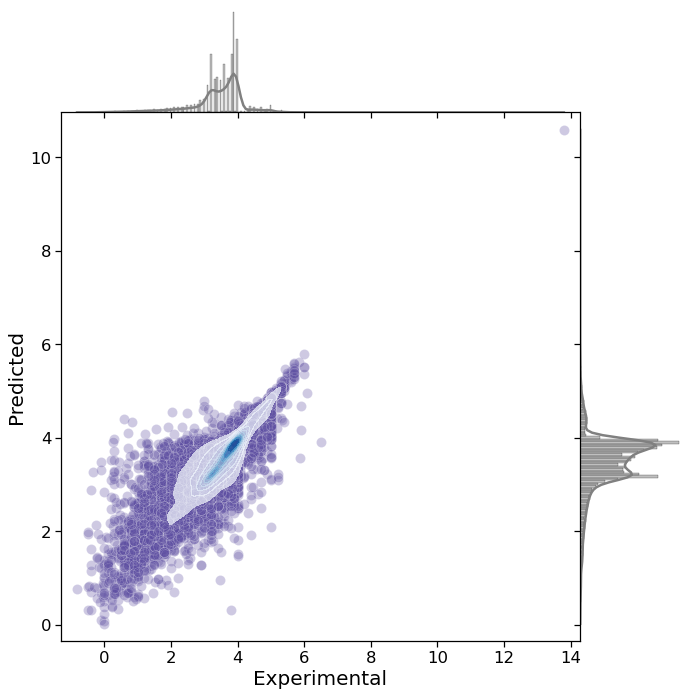

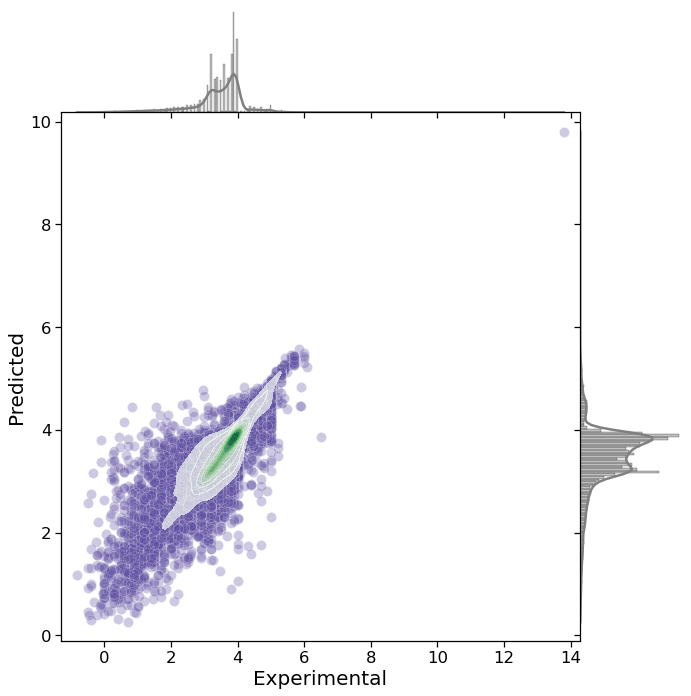

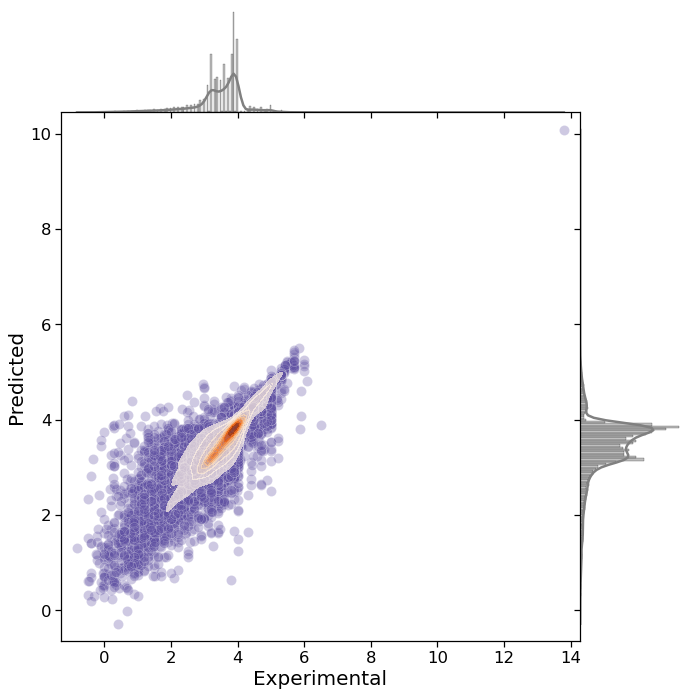

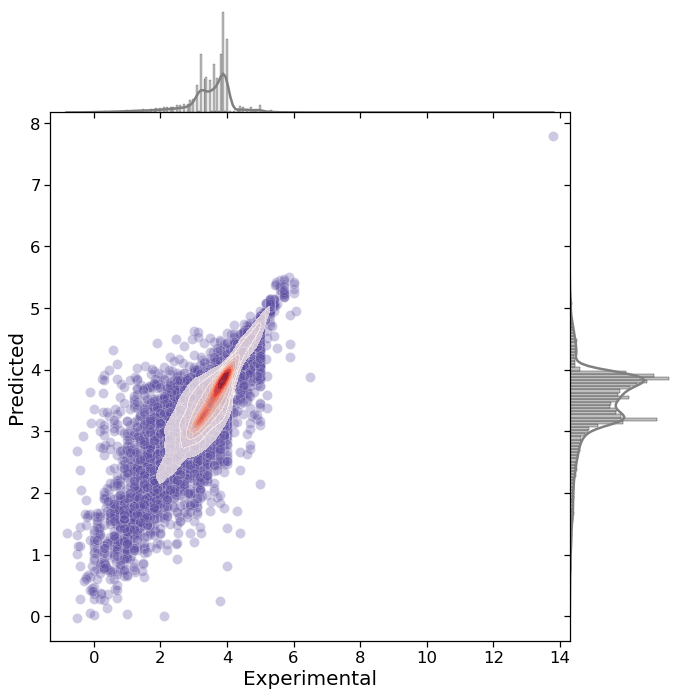

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Pconsc4 predictions
#sns.set_style("whitegrid")
sns.set_palette(["#5e4fa2","#66c2a5","#a6d854","#8da0cb"])
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

g = sns.JointGrid(data=pcons4, x='exp', y='mean', space=0, height=10, ratio=5)
g.plot_joint(sns.scatterplot,  linewidth=0.5, s=100,alpha=.3)
g.plot_joint(sns.kdeplot, fill=True, cmap='Blues', levels=10, thresh=.15, alpha=.7)
g.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)
#g.annotate(sns.kdeplot, xy=(-2.5, 2.5), fontsize=20)
g.ax_joint.set_xlabel('Experimental', fontsize=20)
g.ax_joint.set_ylabel('Predicted', fontsize=20)

# Plot Random predictions
g1 = sns.JointGrid(data=rand, x='exp', y='mean', space=0, height=10, ratio=5)
g1.plot_joint(sns.scatterplot, linewidth=0.5, s=100,alpha=.3)
g1.plot_joint(sns.kdeplot, fill=True, cmap='Greens', levels=10, thresh=.15, alpha=.7)

g1.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)
#g1.annotate(sns.kdeplot, xy=(-2.5, 2.5), fontsize=20)
g1.ax_joint.set_xlabel('Experimental', fontsize=20)
g1.ax_joint.set_ylabel('Predicted', fontsize=20)

# Plot ESM predictions
g2 = sns.JointGrid(data=esm, x='exp', y='mean', space=0, height=10, ratio=5)
g2.plot_joint(sns.scatterplot,  linewidth=0.5, s=100,alpha=.3)
g2.plot_joint(sns.kdeplot, fill=True, cmap='Oranges', levels=10, thresh=.15, alpha=.7)

g2.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)
#g2.annotate(sns.kdeplot, xy=(-2.5, 2.5), fontsize=20)
g2.ax_joint.set_xlabel('Experimental', fontsize=20)
g2.ax_joint.set_ylabel('Predicted', fontsize=20)

# Plot Alpha predictions
g3 = sns.JointGrid(data=alpha, x='exp', y='mean', space=0, height=10, ratio=5)
g3.plot_joint(sns.scatterplot,  linewidth=0.5, s=100,alpha=.3)
g3.plot_joint(sns.kdeplot, fill=True, cmap='Reds', levels=10, thresh=.15, alpha=.7)

g3.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)
#g3.annotate(sns.kdeplot, xy=(-2.5, 2.5), fontsize=20)
g3.ax_joint.set_xlabel('Experimental', fontsize=20)
g3.ax_joint.set_ylabel('Predicted', fontsize=20)

plt.show()

In [20]:
colors = ['#4DBBD5FF','#E64B35FF','#00A087FF','#F39B7FFF']

sns.set_palette(sns.color_palette(colors))

In [22]:
palette[0]

TypeError: 'NoneType' object is not subscriptable

AttributeError: 'JointGrid' object has no attribute 'set_xlabel'

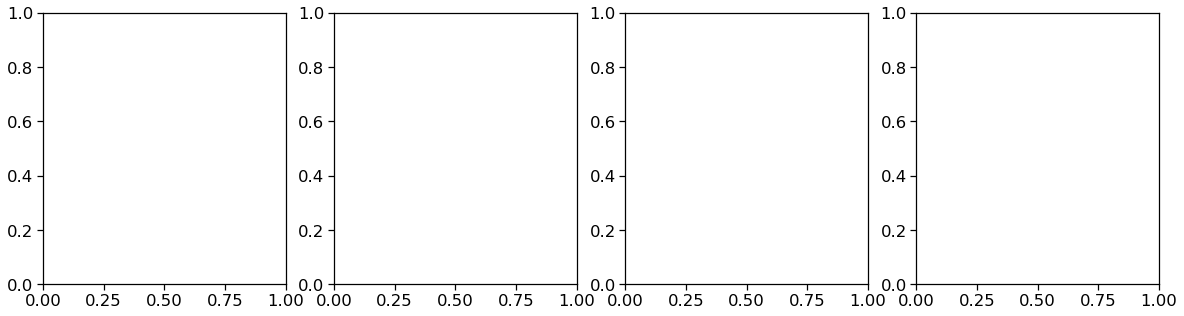

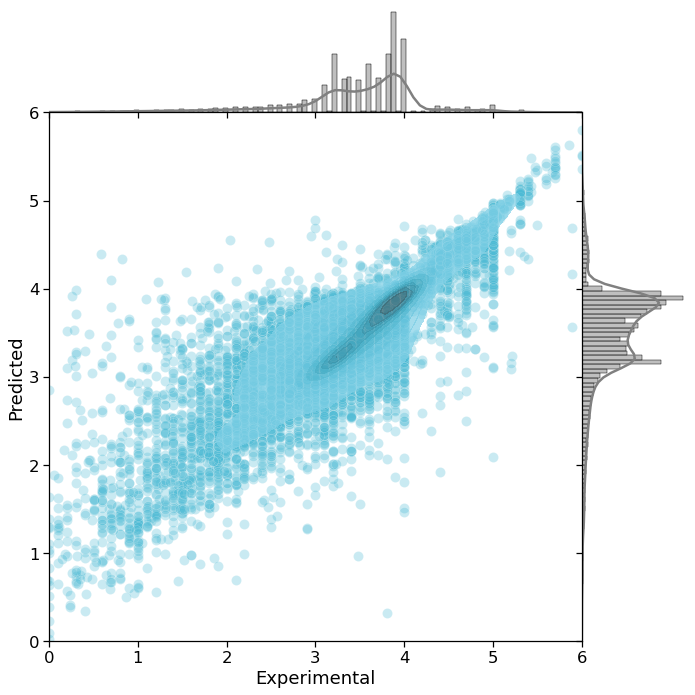

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the palette
#palette = ["#4DBBD5FF", "#E64B35FF", "#F39B7FFF", "#00A087FF"]
# colors = ['#4DBBD5FF','#E64B35FF','#00A087FF','#F39B7FFF']
palette=['Blues','Oranges','Greens','Purples']
# sns.set_palette(sns.color_palette(colors))


# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    ax.annotate(f"$R^2$={r2:.2f}", xy=(0.8, 0.9), xycoords="axes fraction", fontsize=14)

# Define the data
data = [pcons4, rand, esm, alpha]
names = ["Pconsc4", "Random", "ESM", "Alpha"]

# Create the figure
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

# Set the style and context
# sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Loop through the data and names
for i, (d, name) in enumerate(zip(data, names)):
    # Set up the joint plot
    axs[i]= sns.JointGrid(data=d, x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

    # Add the scatter plot and KDE plot
    axs[i].plot_joint(sns.scatterplot, linewidth=0.5, s=100, alpha=0.3)
    axs[i].plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.15, alpha=0.7)

    # Add the marginal histograms
    axs[i].plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)

    # Add the R2 value
    add_r2(g.ax_joint, d["exp"], d["mean"])

    # Set the x and y labels
    axs[i].set_axis_labels("Experimental", "Predicted")

    # Set the title
    #axs[i].set_title(name)

    # Remove the extra tick labels
    if i > 0:
        axs[i].set_ylabel("")
        axs[i].set_yticklabels([])
    if i < 3:
        axs[i].set_xlabel("")
        axs[i].set_xticklabels([])

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


In [41]:
sns.set(font_scale=2)
sns.set_style("white")

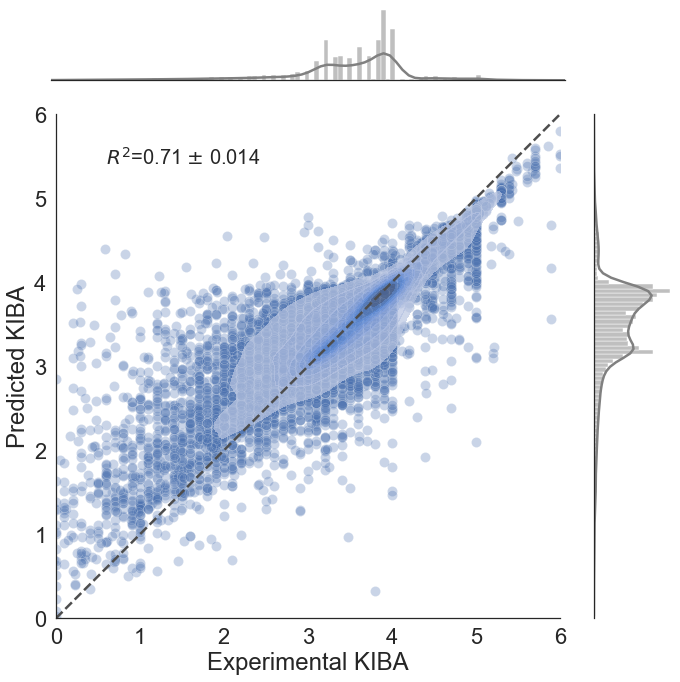

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Load the data
data1=pcons4

# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred,df):
    r2 = r2_score(y_true, y_pred)
    a=r2_score(df['exp'],df['model1'])
    b=r2_score(df['exp'],df['model2'])
    c=r2_score(df['exp'],df['model3'])
    #print(r2,np.std([a,b,c]))
    
    r2_std = np.mean(r2)
    ax.annotate(f"$R^2$={r2:.2f} $\pm$ {np.std([a,b,c]):.3f}", xy=(0.1, 0.9), xycoords="axes fraction", fontsize=20)

# Create the figure
# fig, ax = plt.subplots(figsize=(8, 8))

# Set the style and context
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

# Set up the joint plot
g = sns.JointGrid(data=data1, x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

# Add the scatter plot and KDE plot
g.plot_joint(sns.scatterplot, linewidth=0.5, s=100, alpha=0.3)
g.plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.15, alpha=0.7)

# Add the marginal histograms
g.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)

# Add the R2 value
add_r2(g.ax_joint, data1["exp"], data1["mean"],data1)

g.set_axis_labels("Experimental KIBA", "Predicted KIBA")

# Add square around scatter plot
ax = g.ax_joint
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_aspect('equal')


# Set the title
#g.fig.suptitle("Pconsc4 predicted KIBA")

# Adjust the spacing
g.fig.tight_layout()

# Show the plot
plt.show()
g.fig.savefig('pcons4_kiba_plot.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Load the data


# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred,df):
    r2 = r2_score(y_true, y_pred)
    a=r2_score(df['exp'],df['model1'])
    b=r2_score(df['exp'],df['model2'])
    c=r2_score(df['exp'],df['model3'])
    #print(r2,np.std([a,b,c]))
    
    r2_std = np.mean(r2)
    ax.annotate(f"$R^2$={r2:.2f} $\pm$ {np.std([a,b,c]):.3f}", xy=(0.1, 0.9), xycoords="axes fraction", fontsize=20)

# Create the figure
# fig, ax = plt.subplots(figsize=(8, 8))

# Set the style and context
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

# Set up the joint plot
g = sns.JointGrid(data=pcons4, x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

# Add the scatter plot and KDE plot
g.plot_joint(sns.scatterplot, linewidth=0.5, s=100, alpha=0.3)
g.plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.15, alpha=0.7)

# Add the marginal histograms
g.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)

# Add the R2 value
add_r2(g.ax_joint, pcons4["exp"], pcons4["mean"],pcons4)

g.set_axis_labels("Experimental KIBA", "Predicted KIBA")

# Add square around scatter plot
ax = g.ax_joint
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_aspect('equal')


# Set the title
#g.fig.suptitle("Pconsc4 predicted KIBA")

# Adjust the spacing
g.fig.tight_layout()

# Show the plot
plt.show()
g.fig.savefig('pcons4_kiba_plot.png')

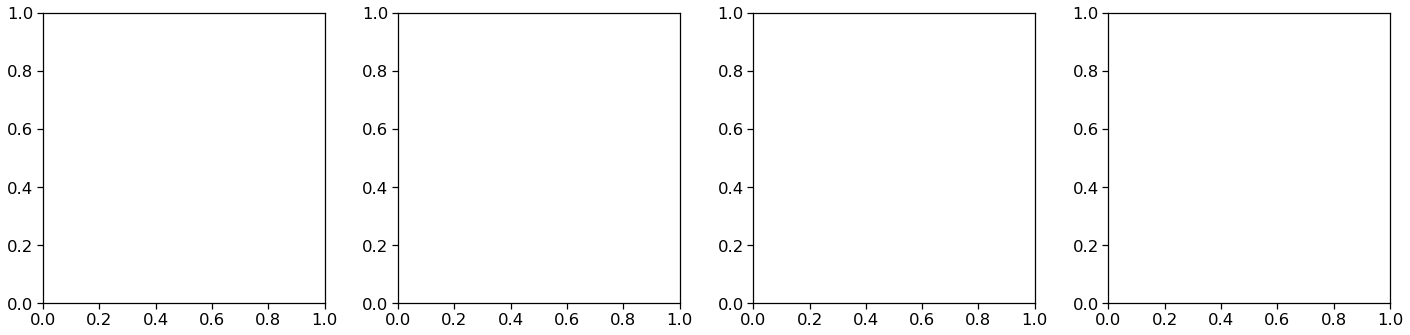

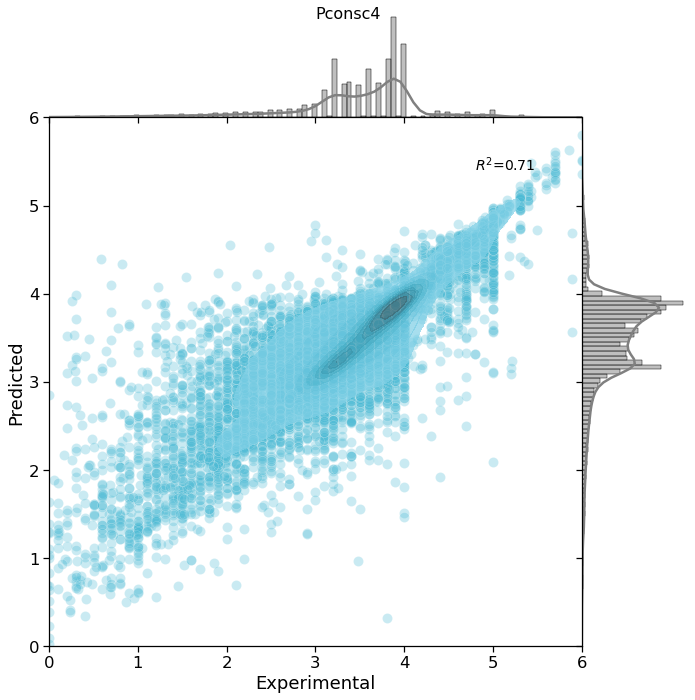

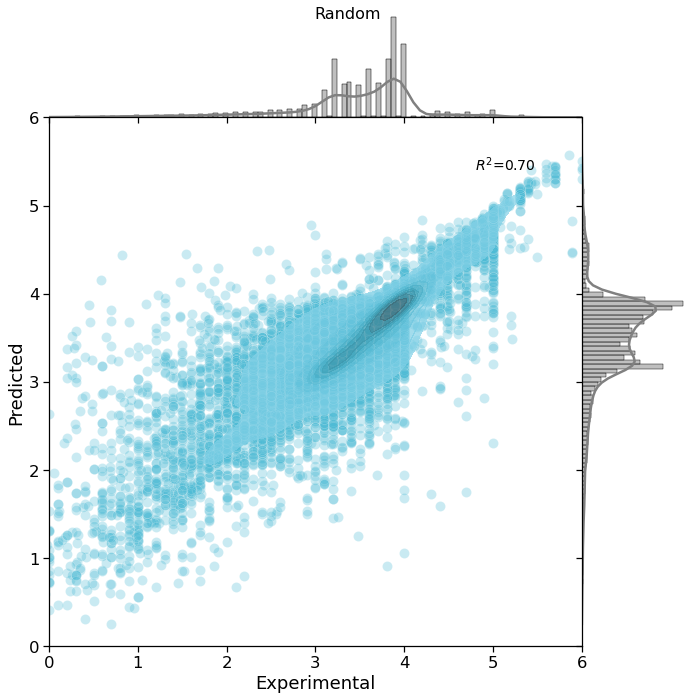

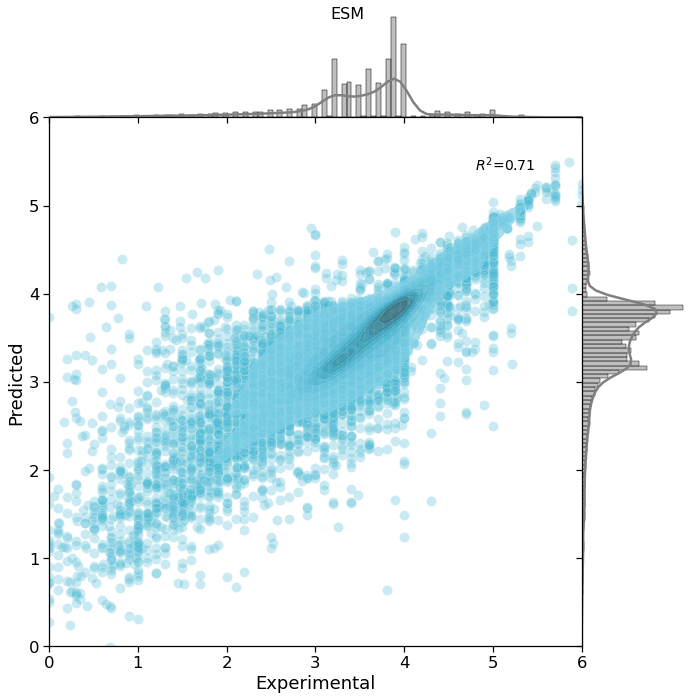

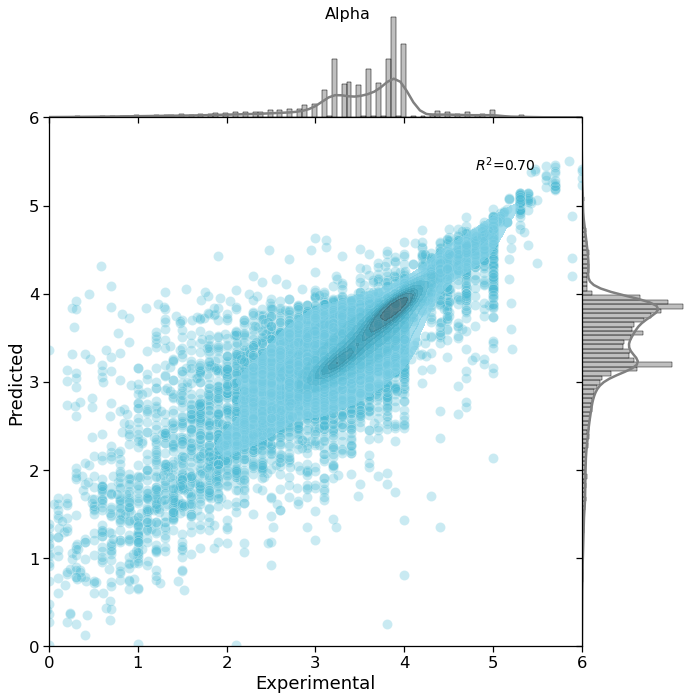

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the palette
colors = ['#4DBBD5FF','#E64B35FF','#00A087FF','#F39B7FFF']
palette = sns.color_palette(colors)

# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    ax.annotate(f"$R^2$={r2:.2f}", xy=(0.8, 0.9), xycoords="axes fraction", fontsize=14)

# Define the data
data = [pcons4, rand, esm, alpha]
names = ["Pconsc4", "Random", "ESM", "Alpha"]

# Create the figure
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

# Set the style and context
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Loop through the data and names
for i, (d, name) in enumerate(zip(data, names)):
    # Set up the joint plot
    g = sns.JointGrid(data=d, x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

    # Add the scatter plot and KDE plot
    g.plot_joint(sns.scatterplot, linewidth=0.5, s=100, alpha=0.3)
    g.plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.15, alpha=0.7)

    # Add the marginal histograms
    g.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)

    # Add the R2 value
    add_r2(g.ax_joint, d["exp"], d["mean"])

    # Set the x and y labels
    g.set_axis_labels("Experimental", "Predicted")

    # Set the title
    g.fig.suptitle(name, fontsize=16)

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


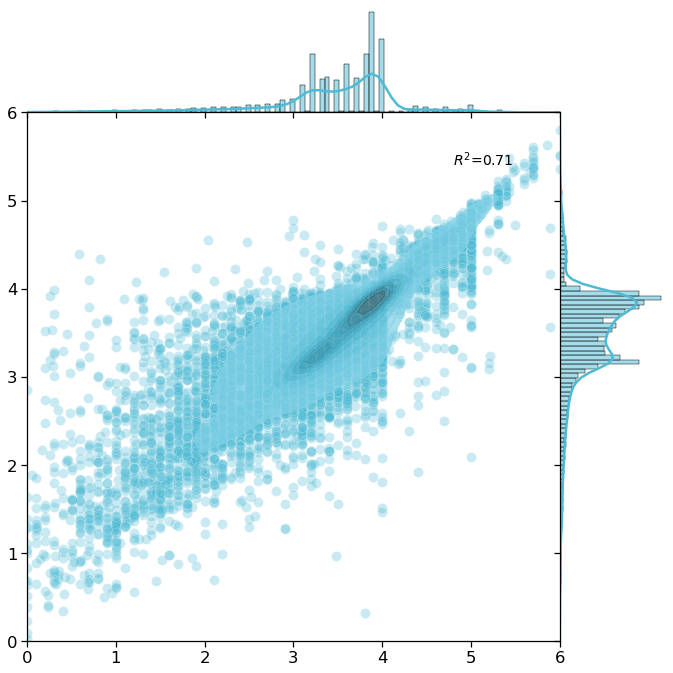

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the palette
#palette = sns.color_palette(['#4DBBD5FF'])

# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    ax.annotate(f"$R^2$={r2:.2f}", xy=(0.8, 0.9), xycoords="axes fraction", fontsize=14)

# Define the data
data = [pcons4, rand, esm, alpha]
names = ["Pconsc4", "Random", "ESM", "Alpha"]

# # Create the figure
# fig, axs = plt.subplots(ncols=1, figsize=(20, 5))

# Set the style and context
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Set up the joint plot
g = sns.JointGrid(data=data[0], x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

# Add the scatter plot and KDE plot
g.plot_joint(sns.scatterplot, linewidth=0.5,color='#4DBBD5FF', s=100, alpha=0.3)
g.plot_joint(sns.kdeplot, fill=True, levels=10,color='#4DBBD5FF', thresh=0.15, alpha=0.7)

# Add the marginal histograms
g.plot_marginals(sns.histplot, kde=True, color='#4DBBD5FF', alpha=.5)

# Add the R2 value
add_r2(g.ax_joint, data[0]["exp"], data[0]["mean"])

# # Set the x and y labels
g.set_axis_labels("", "")

# # Set the title
# g.fig.suptitle(names[0], fontsize=16)

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


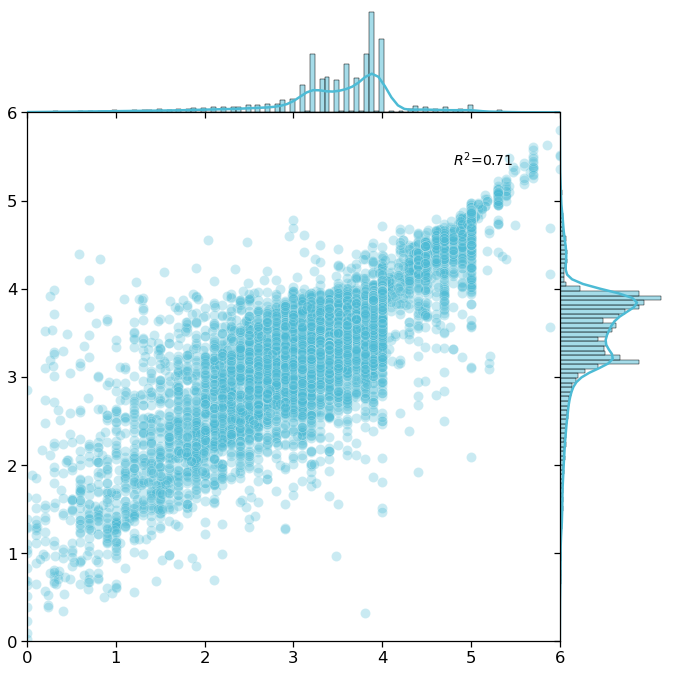

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the palette
#palette = sns.color_palette(['#4DBBD5FF'])

# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    ax.annotate(f"$R^2$={r2:.2f}", xy=(0.8, 0.9), xycoords="axes fraction", fontsize=14)

# Define the data
data = [pcons4, rand, esm, alpha]
names = ["Pconsc4", "Random", "ESM", "Alpha"]

# # Create the figure
# fig, axs = plt.subplots(ncols=1, figsize=(20, 5))

# Set the style and context
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Set up the joint plot
g = sns.JointGrid(data=data[0], x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6))

# Add the scatter plot and KDE plot
g.plot_joint(sns.scatterplot, linewidth=0.5,color='#4DBBD5FF', s=100, alpha=0.3)
#g.plot_joint(sns.kdeplot, fill=True, levels=10,color='#4DBBD5FF', thresh=0.15, alpha=0.7)

# Add the marginal histograms
g.plot_marginals(sns.histplot, kde=True, color='#4DBBD5FF', alpha=.5)

# Add the R2 value
add_r2(g.ax_joint, data[0]["exp"], data[0]["mean"])

# # Set the x and y labels
g.set_axis_labels("", "")

# # Set the title
# g.fig.suptitle(names[0], fontsize=16)

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


TypeError: __init__() got an unexpected keyword argument 'ax'

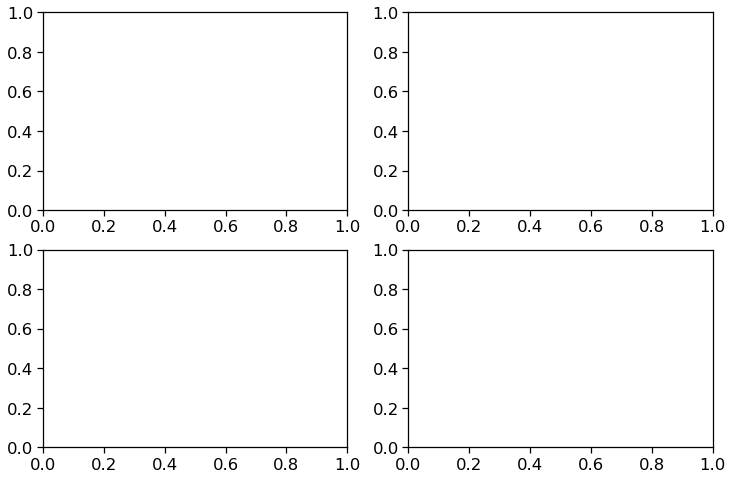

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the palette
palette = ["#4DBBD5FF", "#E64B35FF", "#F39B7FFF", "#00A087FF"]

# Define a function to add the R2 value to the plot
def add_r2(ax, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    ax.annotate(f"$R^2$={r2:.2f}", xy=(0.8, 0.9), xycoords="axes fraction", fontsize=14)

# Define the data
data = [pcons4, rand, esm, alpha]
names = ["Pconsc4", "Random", "ESM", "Alpha"]

# Create the figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Set the style and context
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Loop through the data and names
for i, (d, name) in enumerate(zip(data, names)):
    # Set up the joint plot
    row = i // 2
    col = i % 2
    g = sns.JointGrid(data=d, x="exp", y="mean", space=0, height=10, ratio=5, xlim=(0, 6), ylim=(0, 6), ax=axs[row, col])

    # Add the scatter plot and KDE plot
    g.plot_joint(sns.scatterplot, linewidth=0.5, s=100, alpha=0.3)
    g.plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.15, alpha=0.7)

    # Add the marginal histograms
    g.plot_marginals(sns.histplot, kde=True, color=".5", alpha=.5)

    # Add the R2 value
    add_r2(g.ax_joint, d["exp"], d["mean"])

    # Set the x and y labels
    g.set_axis_labels("Experimental", "Predicted")

    # Set the title
    g.fig.suptitle(name, fontsize=16)

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


In [14]:
from scipy.stats import ttest_ind

# compare Pconsc4 and Random
t, p = ttest_ind(P, P1, equal_var=False)
print("Pconsc4 vs Random: t = {:.3f}, p = {:.3f}".format(t, p))

# compare Pconsc4 and ESM
t, p = ttest_ind(P, P2, equal_var=False)
print("Pconsc4 vs ESM: t = {:.3f}, p = {:.3f}".format(t, p))

# compare Pconsc4 and Alphafold2
t, p = ttest_ind(P, P3, equal_var=False)
print("Pconsc4 vs Alphafold2: t = {:.3f}, p = {:.3f}".format(t, p))

# compare ESM and Alphafold2
t, p = ttest_ind(P2, P3, equal_var=False)
print("ESM vs Alphafold2: t = {:.3f}, p = {:.3f}".format(t, p))

# compare Random and Alphafold2
t, p = ttest_ind(P1, P3, equal_var=False)
print("Random vs Alphafold2: t = {:.3f}, p = {:.3f}".format(t, p))

# compare Random and ESM
t, p = ttest_ind(P1, P2, equal_var=False)
print("Random vs ESM: t = {:.3f}, p = {:.3f}".format(t, p))

Pconsc4 vs Random: t = 0.365, p = 0.715
Pconsc4 vs ESM: t = 4.218, p = 0.000
Pconsc4 vs Alphafold2: t = 2.293, p = 0.022
ESM vs Alphafold2: t = -1.907, p = 0.056
Random vs Alphafold2: t = 1.937, p = 0.053
Random vs ESM: t = 3.867, p = 0.000


In [15]:
from scipy.stats import ttest_ind
import numpy as np

# compare Pconsc4 and Random
t, p = ttest_ind(P, P1, equal_var=False)
d = (np.mean(P) - np.mean(P1)) / np.sqrt(((len(P) - 1) * np.std(P, ddof=1) ** 2 + (len(P1) - 1) * np.std(P1, ddof=1) ** 2) / (len(P) + len(P1) - 2))
print("Pconsc4 vs Random: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Pconsc4 and ESM
t, p = ttest_ind(P, P2, equal_var=False)
d = (np.mean(P) - np.mean(P2)) / np.sqrt(((len(P) - 1) * np.std(P, ddof=1) ** 2 + (len(P2) - 1) * np.std(P2, ddof=1) ** 2) / (len(P) + len(P2) - 2))
print("Pconsc4 vs ESM: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Pconsc4 and Alphafold2
t, p = ttest_ind(P, P3, equal_var=False)
d = (np.mean(P) - np.mean(P3)) / np.sqrt(((len(P) - 1) * np.std(P, ddof=1) ** 2 + (len(P3) - 1) * np.std(P3, ddof=1) ** 2) / (len(P) + len(P3) - 2))
print("Pconsc4 vs Alphafold2: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare ESM and Alphafold2
t, p = ttest_ind(P2, P3, equal_var=False)
d = (np.mean(P2) - np.mean(P3)) / np.sqrt(((len(P2) - 1) * np.std(P2, ddof=1) ** 2 + (len(P3) - 1) * np.std(P3, ddof=1) ** 2) / (len(P2) + len(P3) - 2))
print("ESM vs Alphafold2: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Random and Alphafold2
t, p = ttest_ind(P1, P3, equal_var=False)
d = (np.mean(P1) - np.mean(P3)) / np.sqrt(((len(P1) - 1) * np.std(P1, ddof=1) ** 2 + (len(P3) - 1) * np.std(P3, ddof=1) ** 2) / (len(P1) + len(P3) - 2))
print("Random vs Alphafold2: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Random and ESM
t, p = ttest_ind(P1, P2, equal_var=False)
d = (np.mean(P1) - np.mean(P2)) / np.sqrt(((len(P1) - 1) * np.std(P1, ddof=1) ** 2 + (len(P2) - 1) * np.std(P2, ddof=1) ** 2) / (len(P1) + len(P2) - 2))
print("Random vs ESM: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))


Pconsc4 vs Random: t = 0.365, p = 0.715, Cohen's d = 0.004
Pconsc4 vs ESM: t = 4.218, p = 0.000, Cohen's d = 0.047
Pconsc4 vs Alphafold2: t = 2.293, p = 0.022, Cohen's d = 0.026
ESM vs Alphafold2: t = -1.907, p = 0.056, Cohen's d = -0.021
Random vs Alphafold2: t = 1.937, p = 0.053, Cohen's d = 0.022
Random vs ESM: t = 3.867, p = 0.000, Cohen's d = 0.043


In [18]:
from scipy.stats import ttest_ind
import numpy as np

# compare Pconsc4 
t, p = ttest_ind(P, Y, equal_var=False)
d = (np.mean(P) - np.mean(Y)) / np.sqrt(((len(P) - 1) * np.std(P, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P) + len(Y) - 2))
print("Pconsc4: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Random
t, p = ttest_ind(P1, Y, equal_var=False)
d = (np.mean(P1) - np.mean(Y)) / np.sqrt(((len(P1) - 1) * np.std(P1, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P1) + len(Y) - 2))
print("Random: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare ESM
t, p = ttest_ind(P2, Y, equal_var=False)
d = (np.mean(P2) - np.mean(Y)) / np.sqrt(((len(P2) - 1) * np.std(P2, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P2) + len(Y) - 2))
print("ESM: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# # compare ESM and Alphafold2
# t, p = ttest_ind(P3, Y, equal_var=False)
# d = (np.mean(P2) - np.mean(P3)) / np.sqrt(((len(P2) - 1) * np.std(P2, ddof=1) ** 2 + (len(P3) - 1) * np.std(P3, ddof=1) ** 2) / (len(P2) + len(P3) - 2))
# print("ESM vs Alphafold2: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))



Pconsc4: t = 4.092, p = 0.000, Cohen's d = 0.046
Random: t = 3.791, p = 0.000, Cohen's d = 0.043
Pconsc4 vs Alphafold2: t = 0.502, p = 0.616, Cohen's d = 0.006


In [17]:
from scipy.stats import ttest_ind
import numpy as np

# P, P1, and P2 are the predicted values for Pconsc4, Random, and ESM, respectively
# Y is the ground truth values

# compare Pconsc4 
t, p = ttest_ind(P, Y, equal_var=False)
d = (np.mean(P) - np.mean(Y)) / np.sqrt(((len(P) - 1) * np.std(P, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P) + len(Y) - 2))
print("Pconsc4: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare Random
t, p = ttest_ind(P1, Y, equal_var=False)
d = (np.mean(P1) - np.mean(Y)) / np.sqrt(((len(P1) - 1) * np.std(P1, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P1) + len(Y) - 2))
print("Random: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# compare ESM
t, p = ttest_ind(P2, Y, equal_var=False)
d = (np.mean(P2) - np.mean(Y)) / np.sqrt(((len(P2) - 1) * np.std(P2, ddof=1) ** 2 + (len(Y) - 1) * np.std(Y, ddof=1) ** 2) / (len(P2) + len(Y) - 2))
print("ESM: t = {:.3f}, p = {:.3f}, Cohen's d = {:.3f}".format(t, p, d))

# # compare Alphafold2
# t, p = ttest_ind(P3, Y, equal_var=False)
# d = (


Pconsc4: t = 4.092, p = 0.000, Cohen's d = 0.046
Random: t = 3.791, p = 0.000, Cohen's d = 0.043
ESM: t = 0.502, p = 0.616, Cohen's d = 0.006


In [5]:
# Randomly selected 50 data points from the test set
n =50
np.random.seed(22)
index = np.random.choice(len(Y), n, replace=False)  
#Pconsc4
x_random = Y[index] 
y_random = P[index] 
ers_random=ers[index]
#Random
x_random1 = Y1[index] 
y_random1 = P1[index] 
ers_random1=ers1[index]
#ESM
x_random2 = Y2[index] 
y_random2 = P2[index] 
ers_random2=ers2[index]
#Alpha
x_random3 = Y3[index] 
y_random3 = P3[index] 
ers_random3=ers3[index]
#Pconsc4_Random_Mol_graph
x_random4 = Y4[index] 
y_random4 = P4[index] 
ers_random4=ers4[index]

In [68]:
sns.set(font_scale = 11.5,style="white")

### Correlation plots- Protein encodings

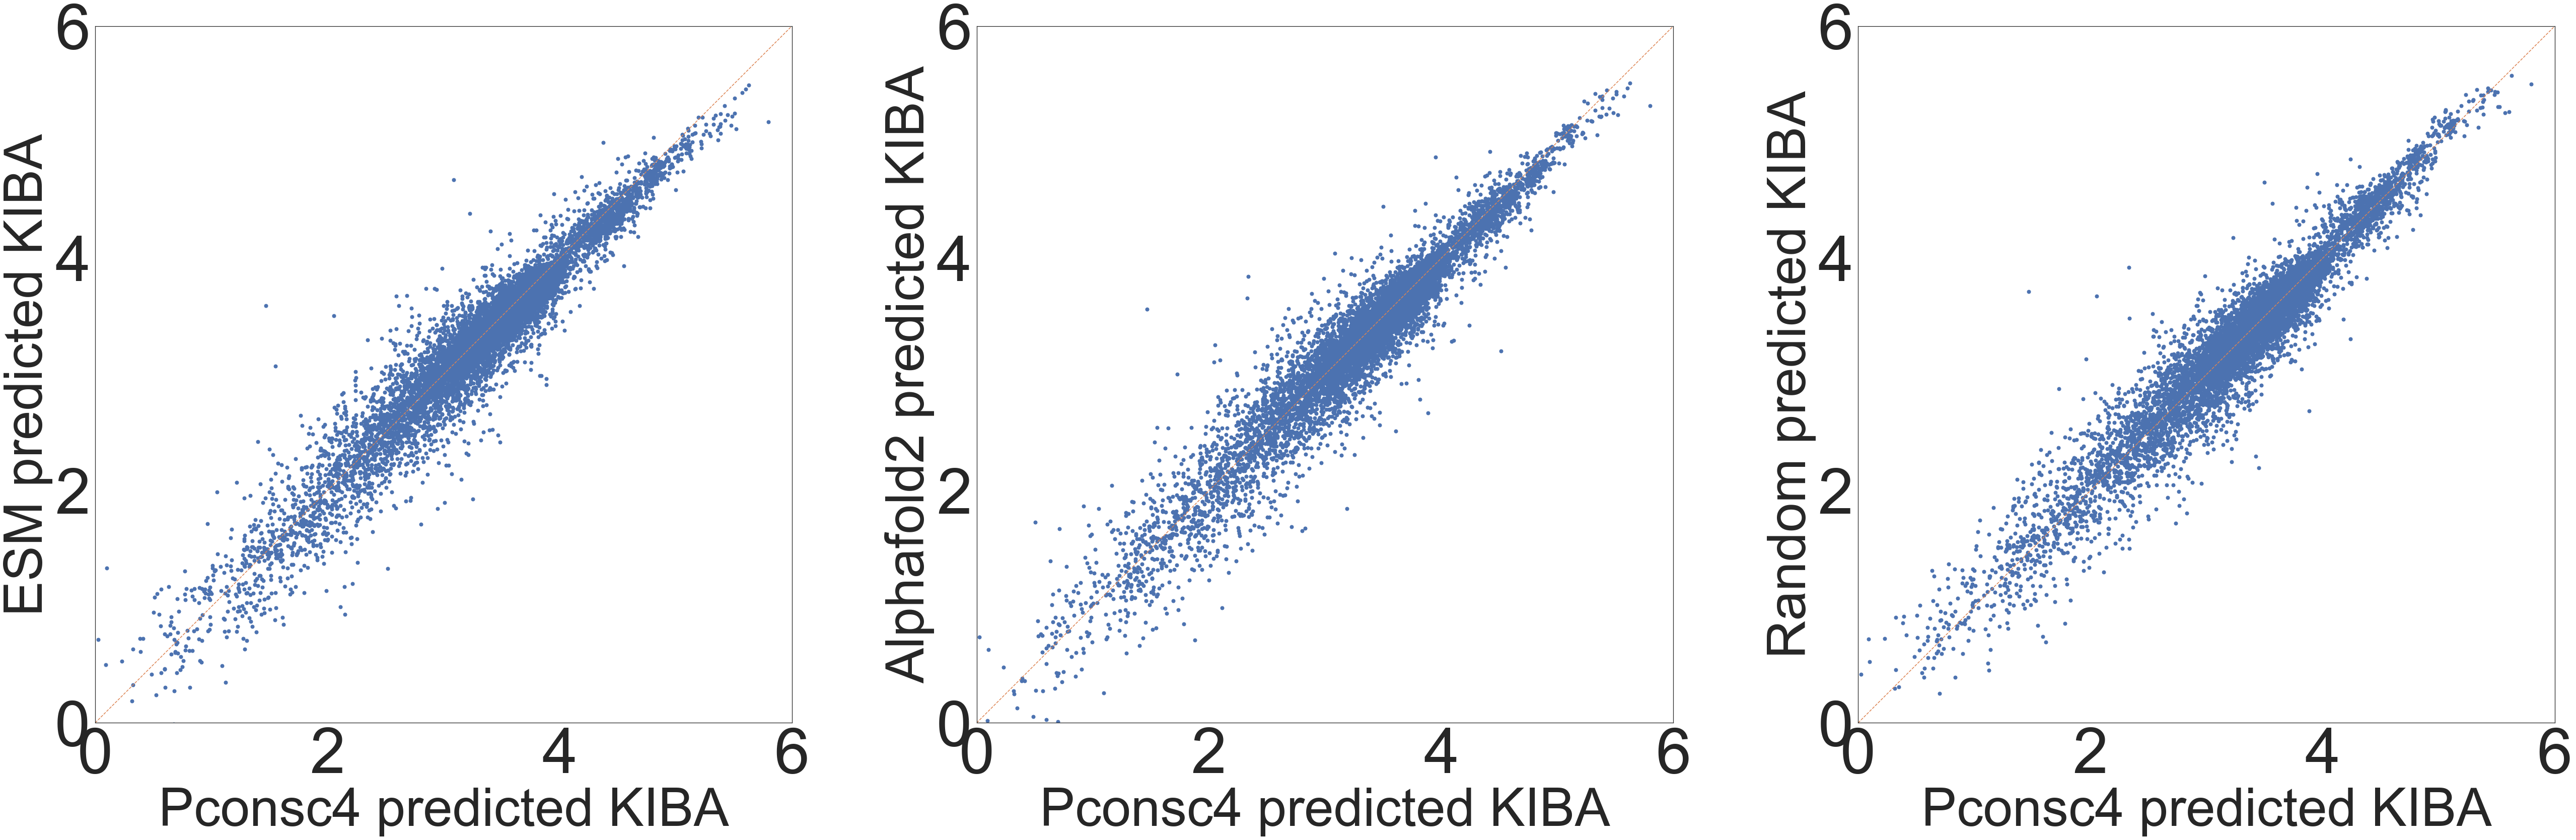

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(75,75), sharex=True)
x = np.linspace(0,6,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(pcons4['mean'], esm['mean'],lw=0, marker ='o', ms=9) 
axes[0].plot(x,x,'--',ms=9)
axes[0].set_ylabel('ESM predicted KIBA',fontsize=125)
axes[0].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])

axes[1].set_aspect('equal', adjustable='box')
axes[1].plot(pcons4['mean'], alpha['mean'],lw=0, marker ='o', ms=7) 
axes[1].plot(x,x,'--',ms=5)
axes[1].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[1].set_ylabel('Alphafold2 predicted KIBA',fontsize=105)
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,6])


axes[2].set_aspect('equal', adjustable='box')
axes[2].set_xlim([0,6])
axes[2].set_ylim([0,6])
axes[2].plot(pcons4['mean'], rand['mean'],lw=0, marker ='o', ms=7) 
axes[2].plot(x,x,'--',ms=5)
axes[2].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[2].set_ylabel('Random predicted KIBA',fontsize=105)

fig.tight_layout()
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.svg'), dpi=500, bbox_inches='tight')

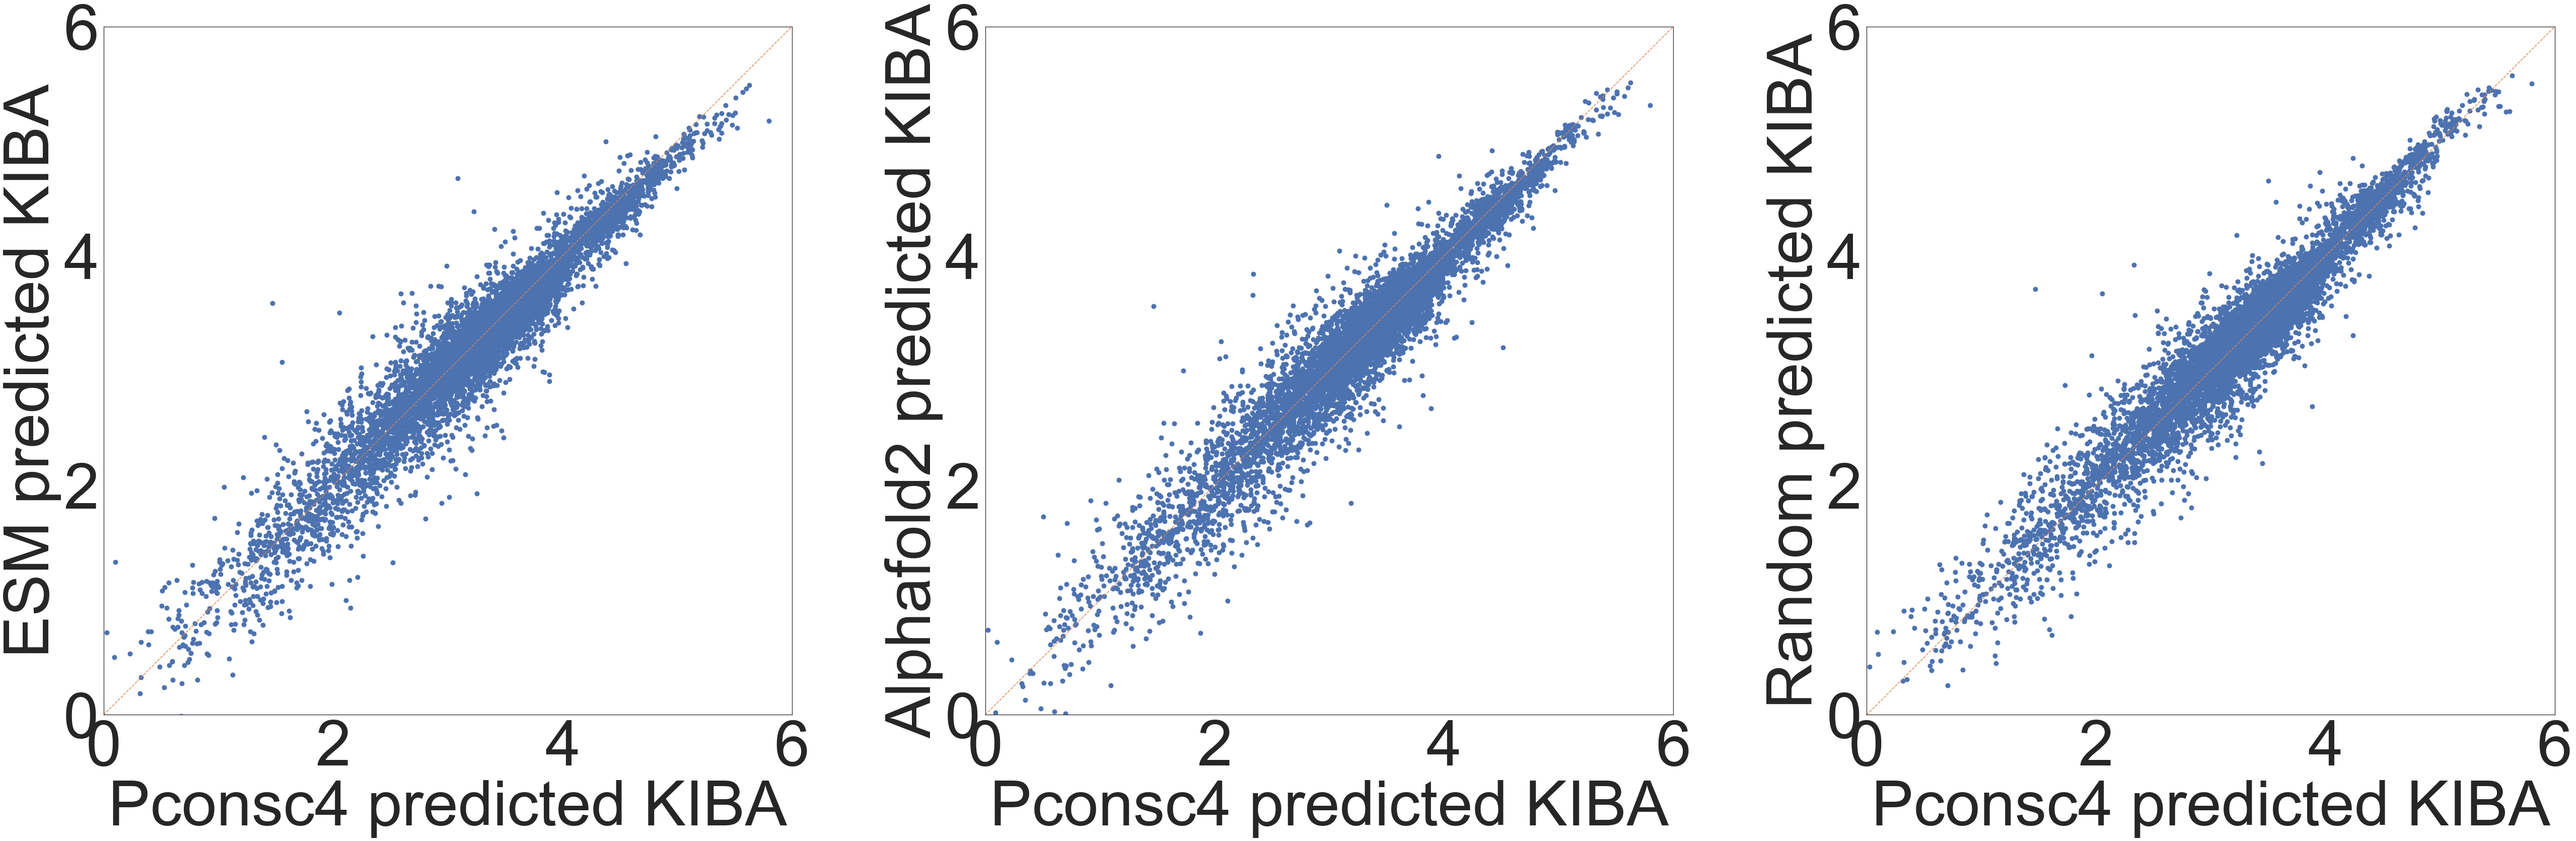

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(75,75), sharex=True)
x = np.linspace(0,6,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(pcons4['mean'], esm['mean'],lw=0, marker ='o', ms=9) 
axes[0].plot(x,x,'--',ms=5)
axes[0].set_ylabel('ESM predicted KIBA',fontsize=125)
axes[0].set_xlabel('Pconsc4 predicted KIBA',fontsize=125)
axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])

axes[1].set_aspect('equal', adjustable='box')
axes[1].plot(pcons4['mean'], alpha['mean'],lw=0, marker ='o', ms=9) 
axes[1].plot(x,x,'--',ms=9)
axes[1].set_xlabel('Pconsc4 predicted KIBA',fontsize=125)
axes[1].set_ylabel('Alphafold2 predicted KIBA',fontsize=125)
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,6])


axes[2].set_aspect('equal', adjustable='box')
axes[2].set_xlim([0,6])
axes[2].set_ylim([0,6])
axes[2].plot(pcons4['mean'], rand['mean'],lw=0, marker ='o', ms=9) 
axes[2].plot(x,x,'--',ms=9)
axes[2].set_xlabel('Pconsc4 predicted KIBA',fontsize=125)
axes[2].set_ylabel('Random predicted KIBA',fontsize=125)

fig.tight_layout()
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins' + '.svg'), dpi=500, bbox_inches='tight')

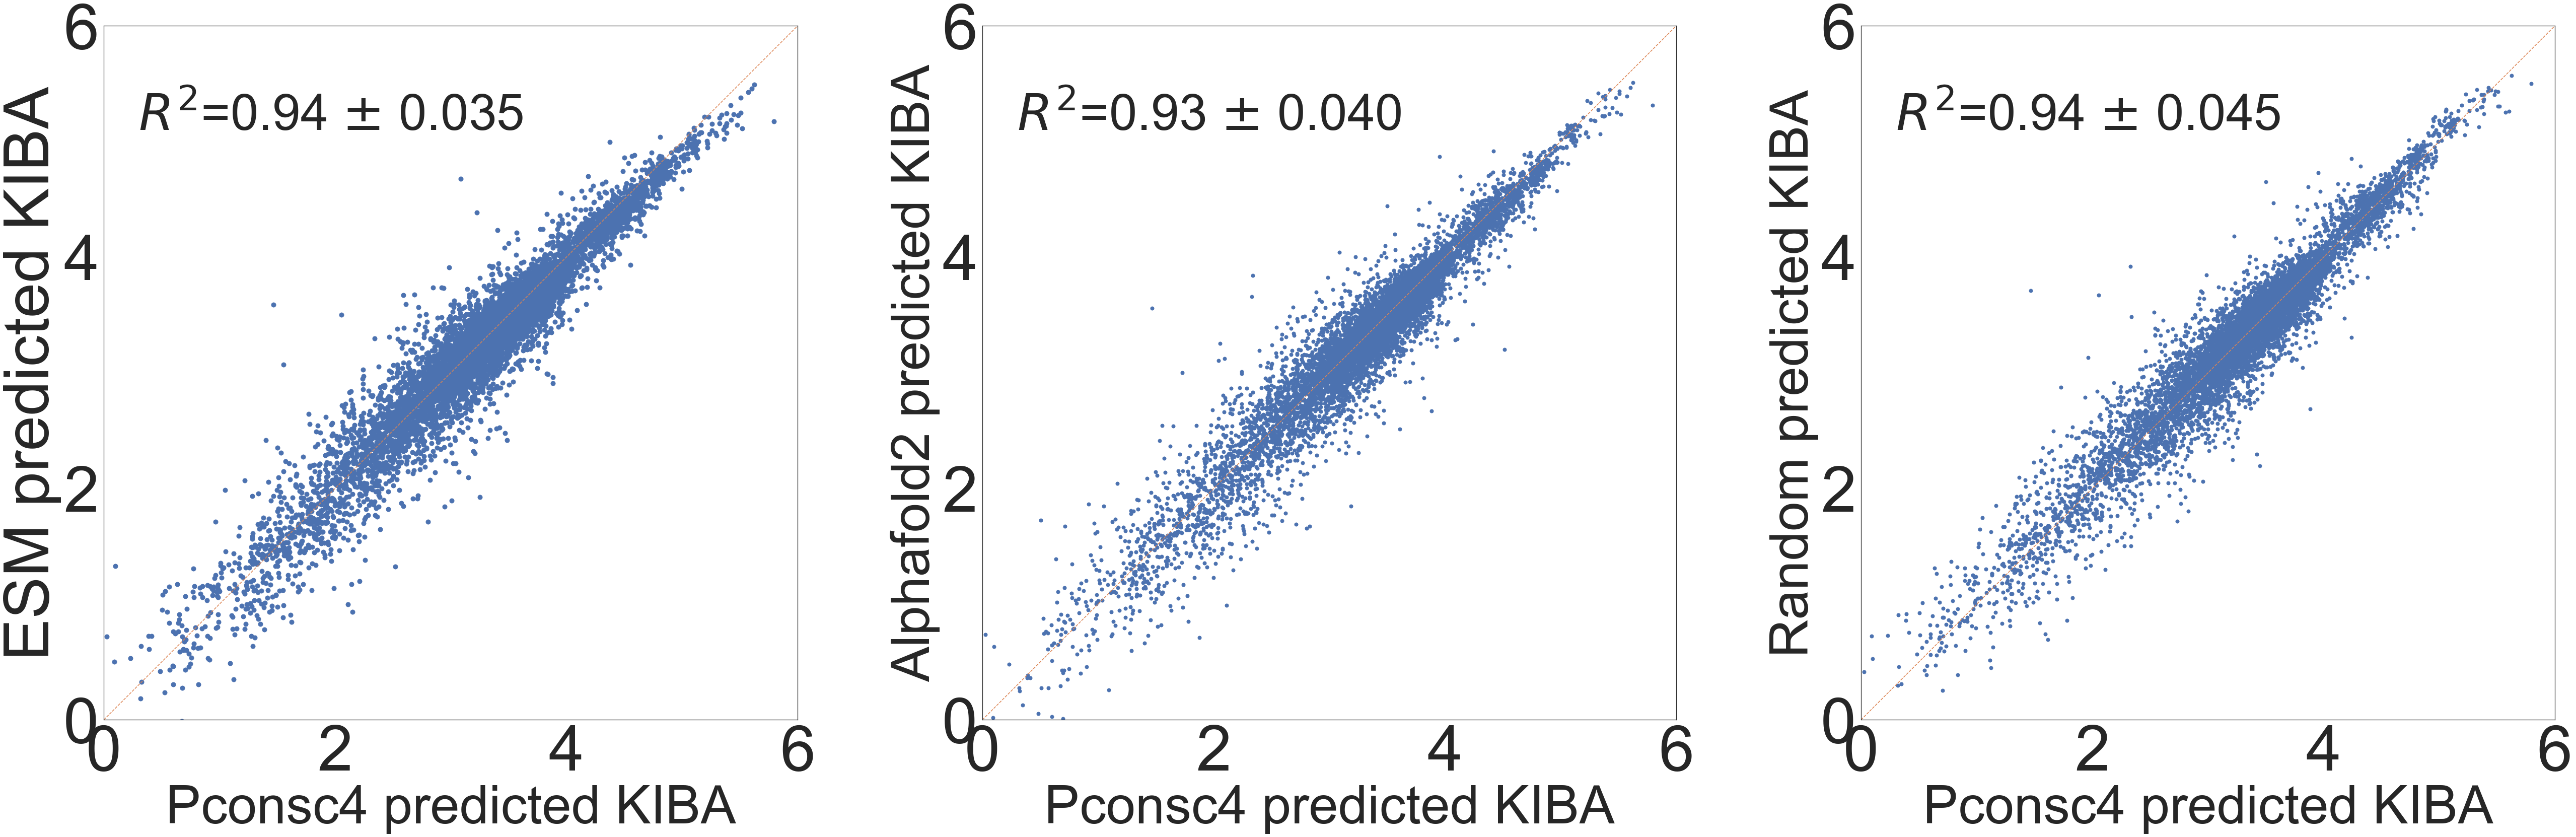

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import os


# Define a function to add the R2 value to the plot
def add_r2(ax,df,df1):
    r2 = r2_score(df['mean'], df1['mean'])
    a=r2_score(df1['model1'],df['model1'])
    b=r2_score(df1['model2'],df['model2'])
    c=r2_score(df1['model3'],df['model3'])
    r2_std = np.mean(r2)
    ax.annotate(f"$R^2$={r2:.2f} $\pm$ {np.std([a,b,c]):.3f}", xy=(0.05, 0.85), xycoords="axes fraction", fontsize=100)

# Create the figure
fig, axes = plt.subplots(1, 3, figsize=(75,75), sharex=True)
x = np.linspace(0,6,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(pcons4['mean'], esm['mean'],lw=0, marker ='o', ms=9) 
axes[0].plot(x,x,'--',ms=20)
axes[0].set_ylabel('ESM predicted KIBA',fontsize=125)
axes[0].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])
add_r2(axes[0],pcons4,esm)

axes[1].set_aspect('equal', adjustable='box')
axes[1].plot(pcons4['mean'], alpha['mean'],lw=0, marker ='o', ms=7) 
axes[1].plot(x,x,'--',ms=20)
axes[1].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[1].set_ylabel('Alphafold2 predicted KIBA',fontsize=105)
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,6])
add_r2(axes[1],pcons4,alpha)

axes[2].set_aspect('equal', adjustable='box')
axes[2].set_xlim([0,6])
axes[2].set_ylim([0,6])
axes[2].plot(pcons4['mean'], rand['mean'],lw=0, marker ='o', ms=7) 
axes[2].plot(x,x,'--',ms=20)
axes[2].set_xlabel('Pconsc4 predicted KIBA',fontsize=105)
axes[2].set_ylabel('Random predicted KIBA',fontsize=105)
add_r2(axes[2],pcons4,rand)

fig.tight_layout()
fig.savefig(os.path.join('results_plots',  'correlation_proteins_kiba' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins_kiba' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'correlation_proteins_kiba' + '.svg'), dpi=500,  bbox_inches='tight')


In [177]:
r2=r2_score(P3,P)
a=r2_score(df3['model1'],df['model1'])
b=r2_score(df3['model2'],df['model2'])
c=r2_score(df3['model3'],df['model3'])
print(r2,np.std([a,b,c]))

0.9342681533473245 0.039706465008493376


In [ ]:
def add_r2(ax,df,df1):
    r2 = r2_score(df['mean'], df1['mean'])
    a=r2_score(df1['model1'],df['model1'])
    b=r2_score(df1['model2'],df['model2'])
    c=r2_score(df1['model3'],df['model3'])
    r2_std = np.mean(r2)
    ax.annotate(f"$R^2$={r2:.2f} $\pm$ {np.std([a,b,c]):.3f}", xy=(0.1, 0.9), xycoords="axes fraction", fontsize=20)


### Predicted vs. Experimental for all the four protein encoding methods

In [16]:
sns.set(font_scale = 13,style="white")

In [17]:
fs=135
marker_size=12

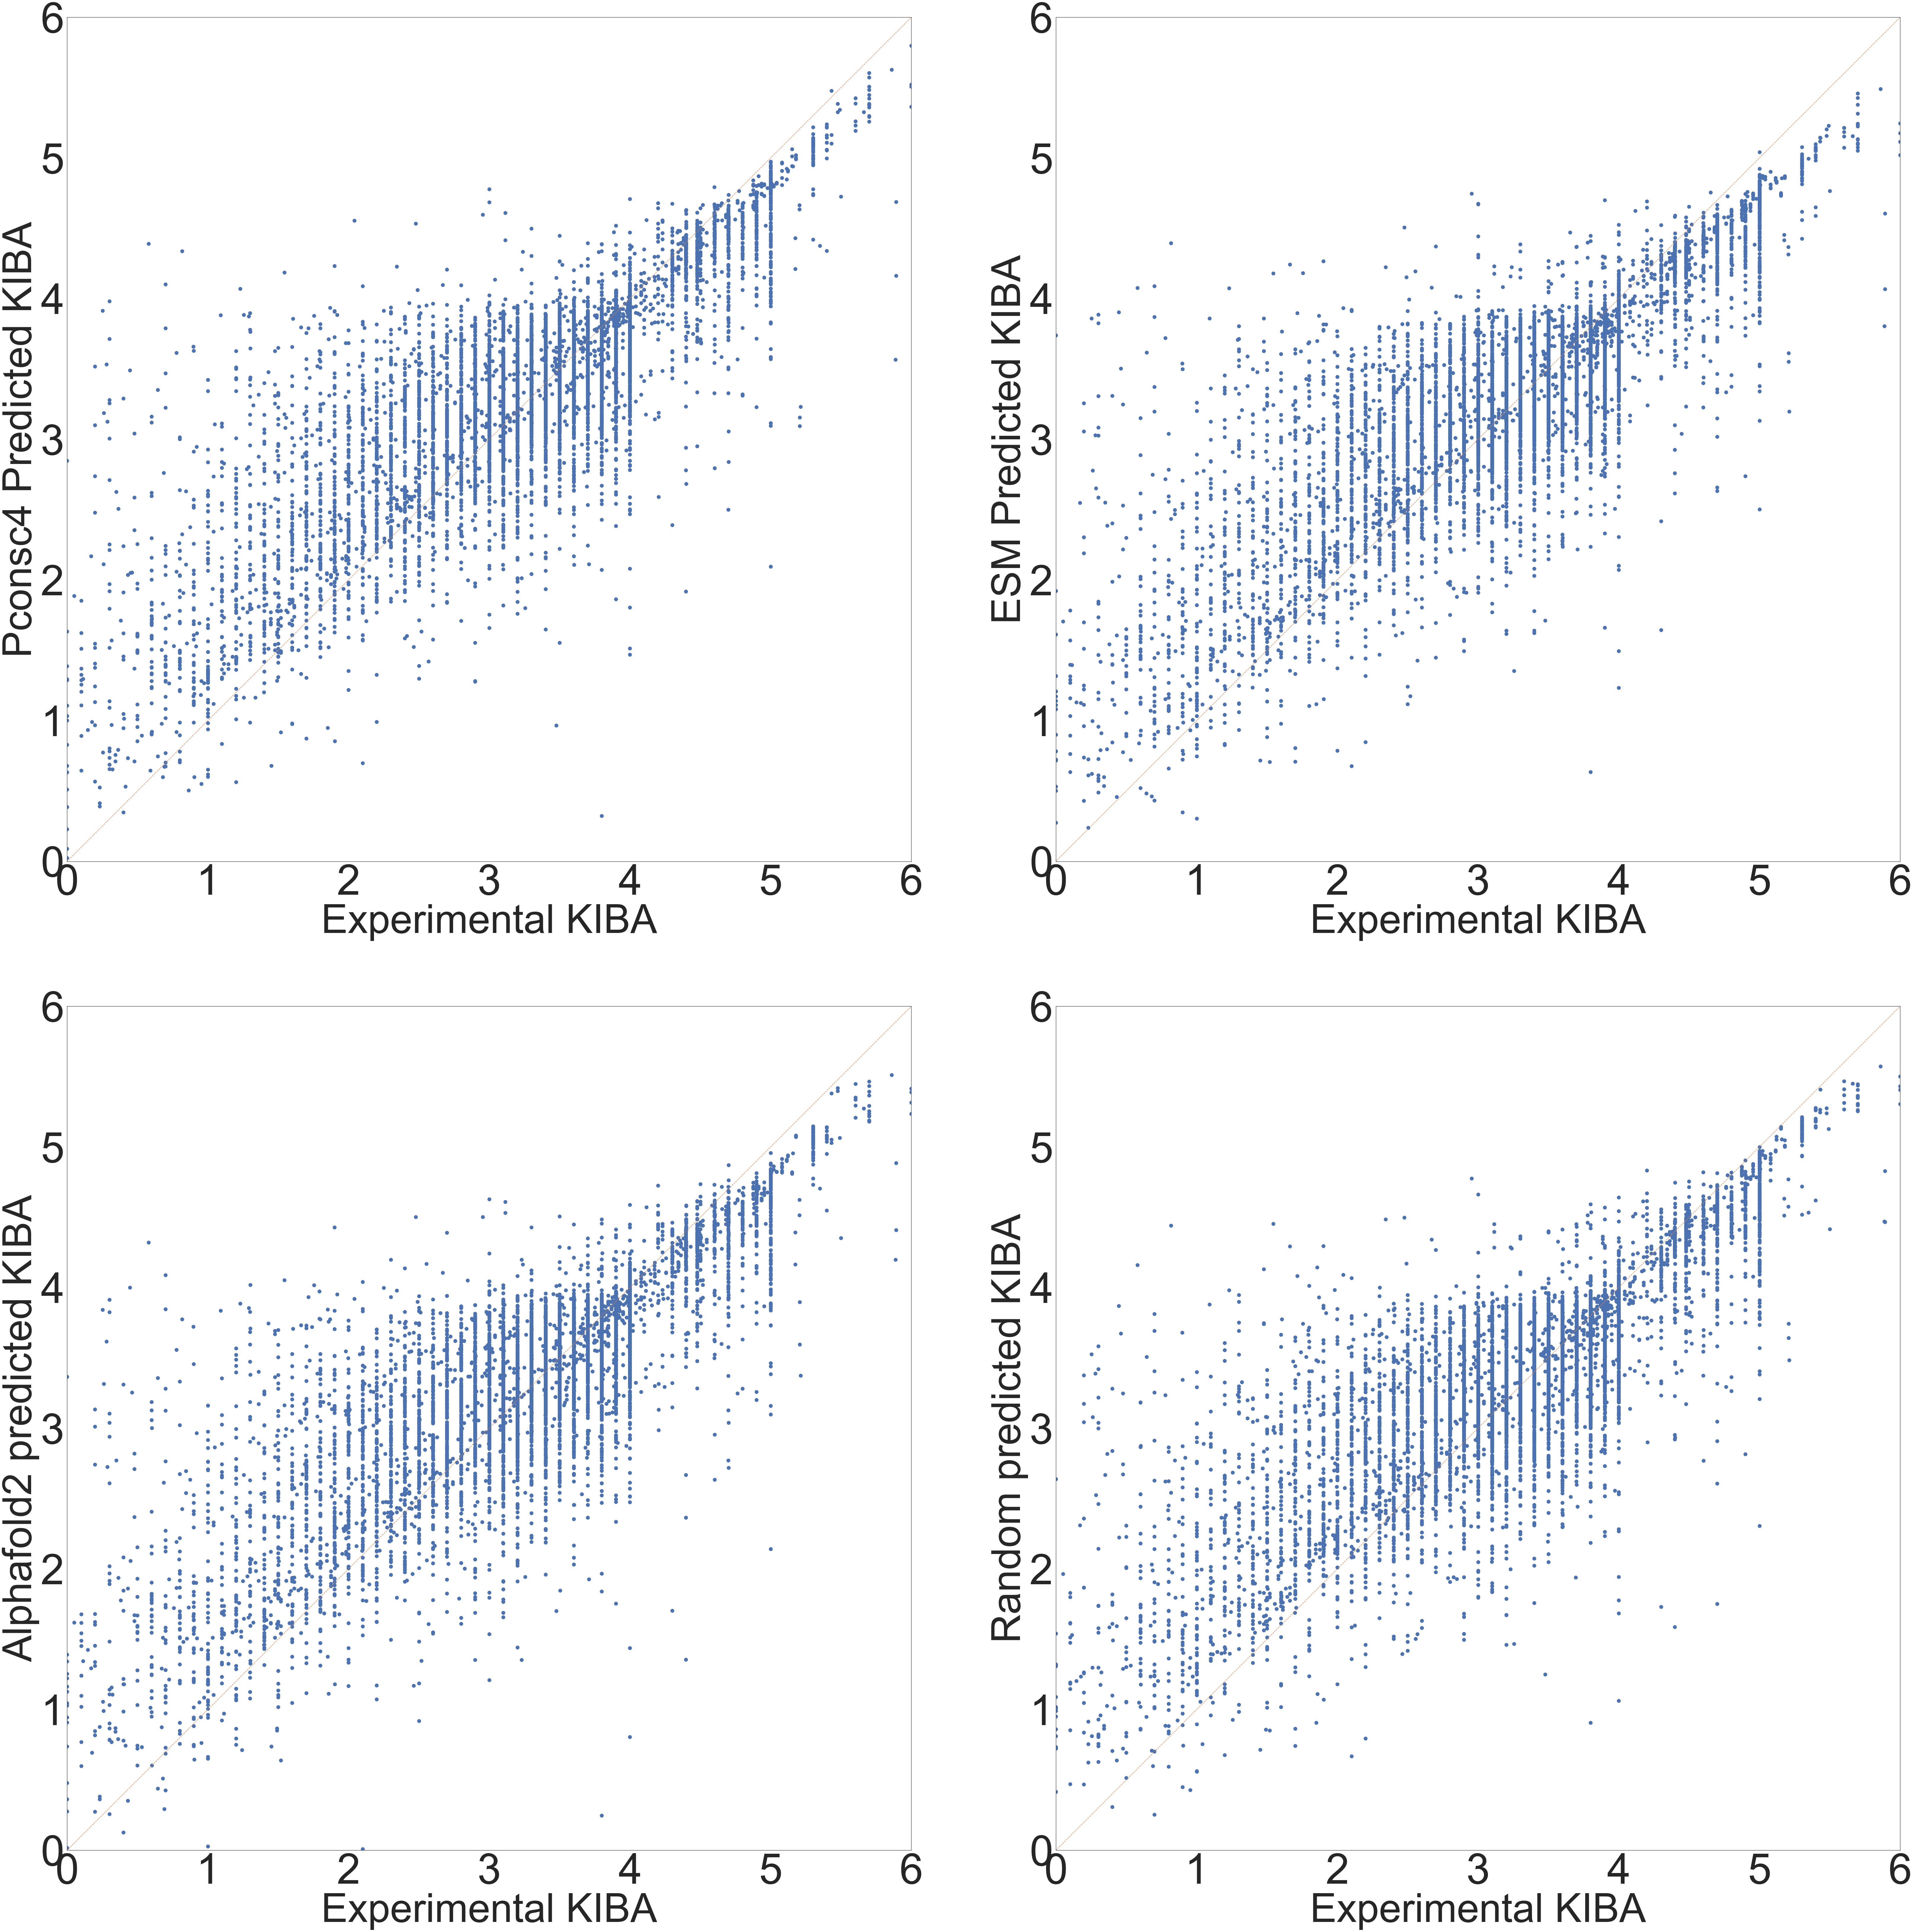

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(95,95))
x = np.linspace(0,6,5)

axes[0][0].set_aspect('equal', adjustable='box')
axes[0][0].plot(pcons4['exp'],pcons4['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][0].plot(x,x,'--',ms=marker_size)
axes[0][0].set_xlabel('Experimental KIBA',fontsize=fs)
axes[0][0].set_ylabel('Pconsc4 Predicted KIBA',fontsize=fs)
axes[0][0].set_ylim([0,6])
axes[0][0].set_xlim([0,6])

axes[0][1].set_aspect('equal', adjustable='box')
axes[0][1].plot(esm['exp'],esm['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][1].plot(x,x,'--',ms=marker_size)
axes[0][1].set_xlabel('Experimental KIBA',fontsize=fs)
axes[0][1].set_ylabel('ESM Predicted KIBA',fontsize=fs)
axes[0][1].set_xlim([0,6])
axes[0][1].set_ylim([0,6])


axes[1][0].set_aspect('equal', adjustable='box')
axes[1][0].plot(alpha['exp'],alpha['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][0].plot(x,x,'--',ms=marker_size)
axes[1][0].set_xlabel('Experimental KIBA',fontsize=fs)
axes[1][0].set_ylabel('Alphafold2 predicted KIBA',fontsize=fs)
axes[1][0].set_xlim([0,6])
axes[1][0].set_ylim([0,6])

axes[1][1].set_aspect('equal', adjustable='box')
axes[1][1].plot(rand['exp'],rand['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][1].plot(x,x,'--',ms=marker_size)
axes[1][1].set_xlabel('Experimental KIBA',fontsize=fs)
axes[1][1].set_ylabel('Random predicted KIBA',fontsize=fs)
axes[1][1].set_xlim([0,6])
axes[1][1].set_ylim([0,6])

fig.tight_layout()
fig.savefig(os.path.join('results_plots',  'pred_vs_exp_proteins' + '.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'pred_vs_exp_proteins' + '.pdf'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'pred_vs_exp_proteins' + '.svg'), dpi=300, bbox_inches='tight')

### Error bars- Preicted vs. Experimetnal for ligand encodings on 50 test samples

In [19]:
sns.set(font_scale = 11,style="white")

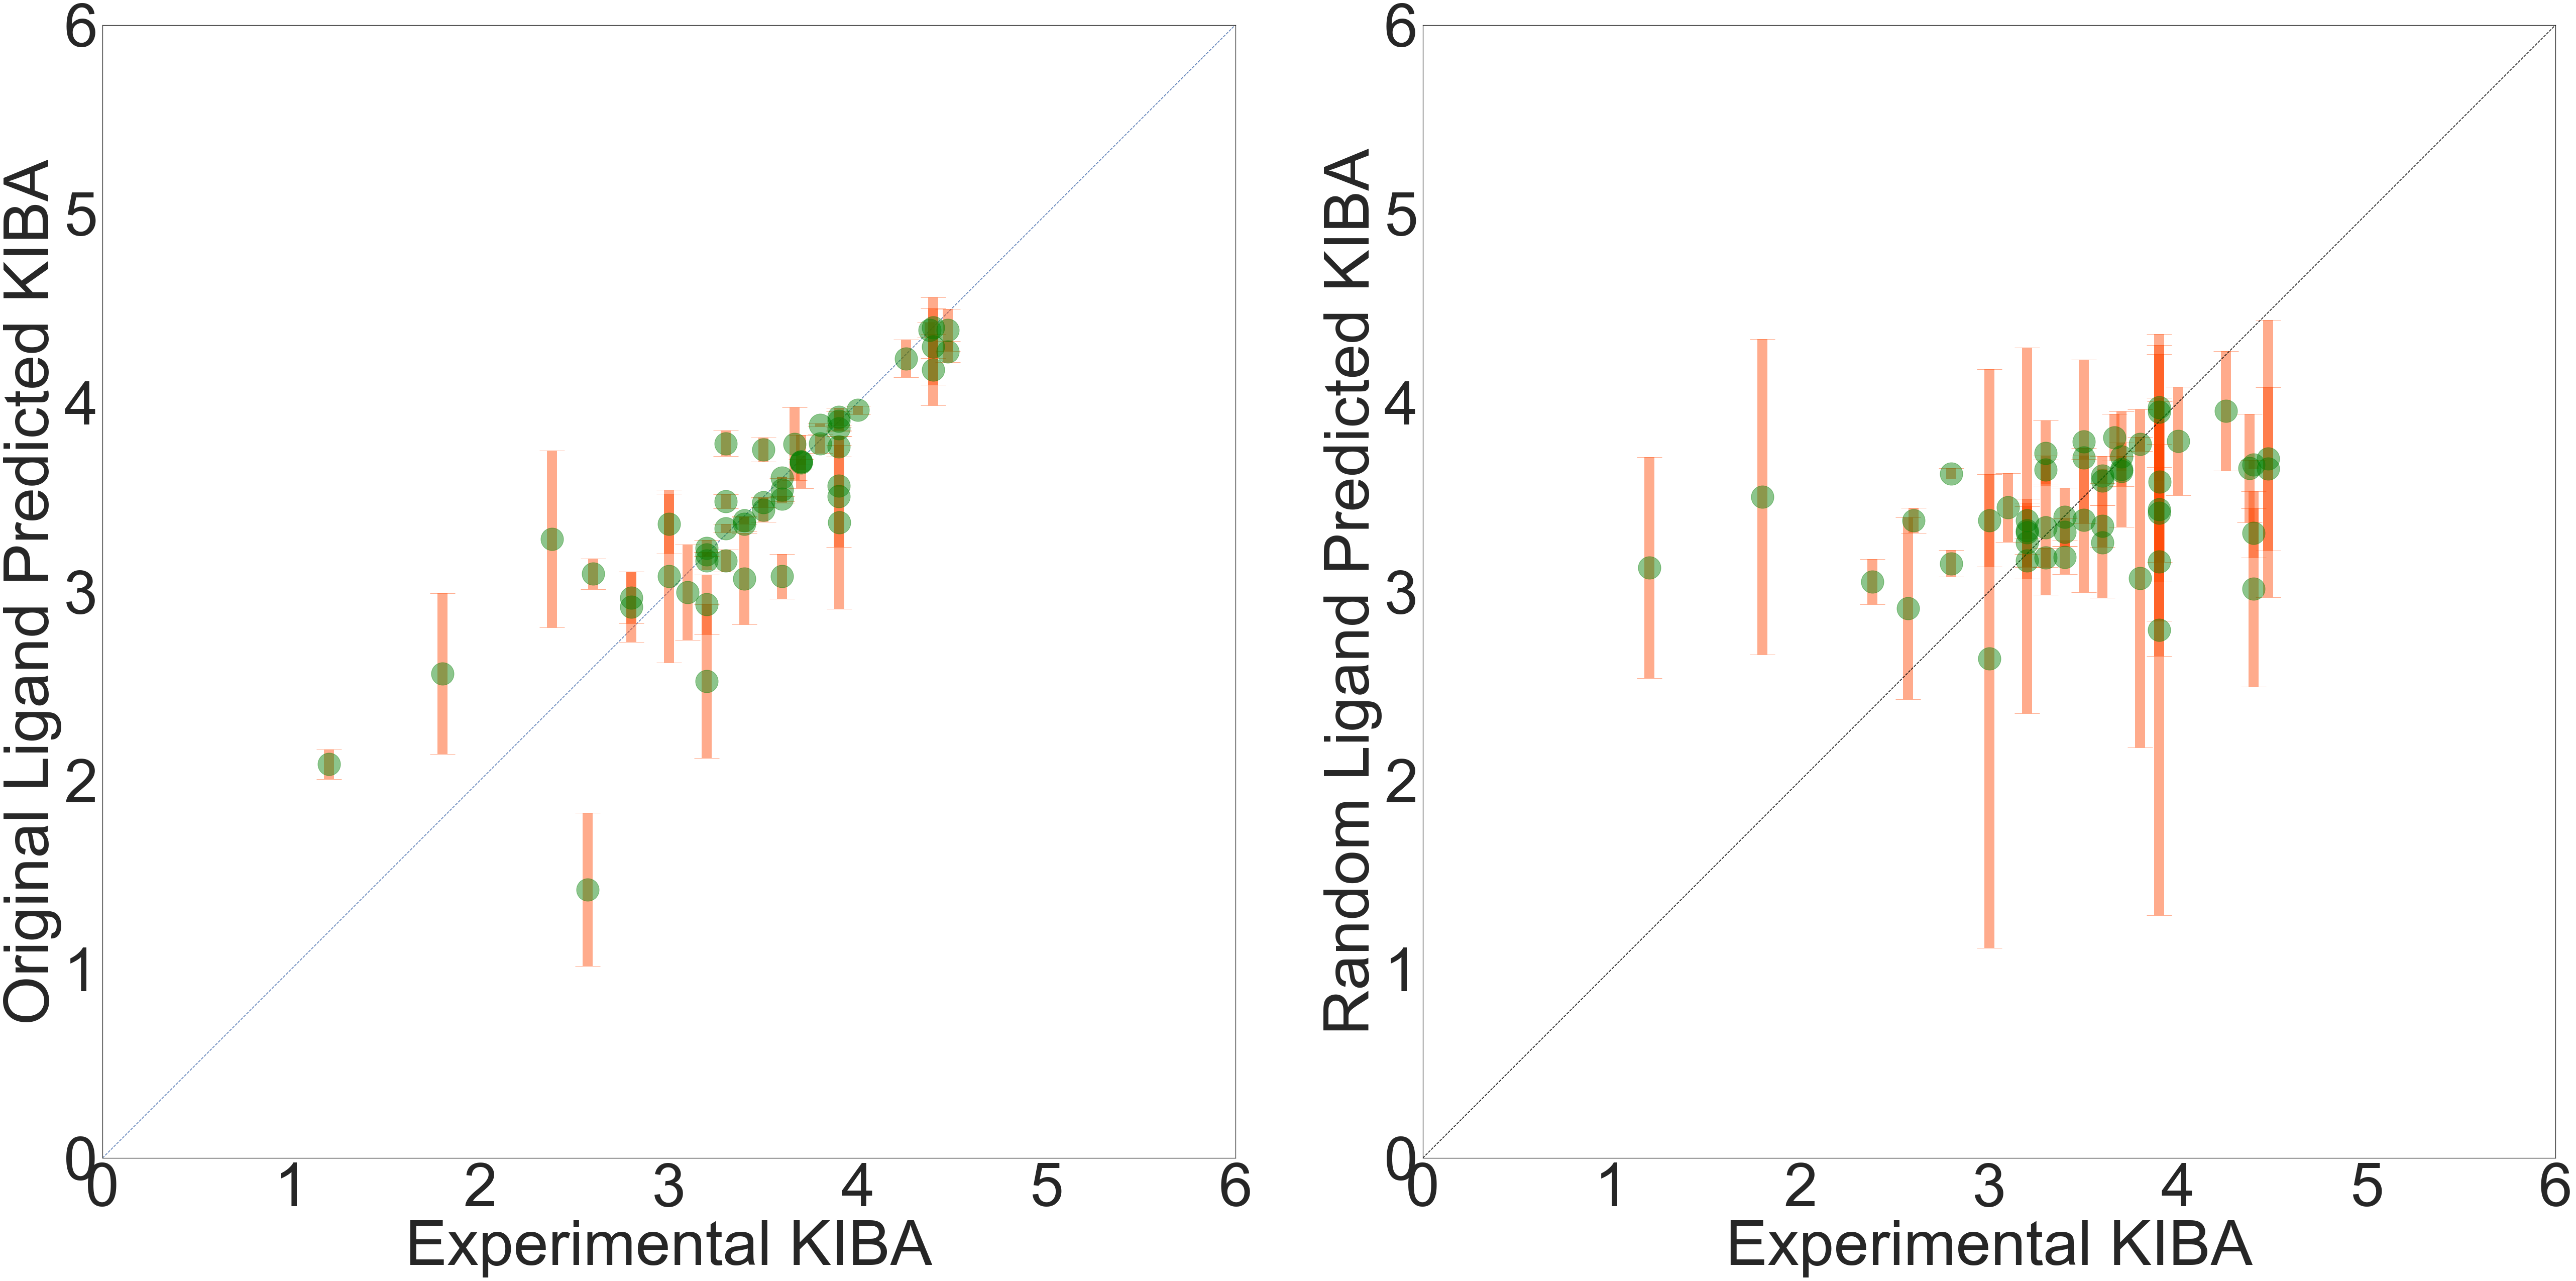

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(75,75), sharex=True)
x = np.linspace(0,6,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(x,x,'--',ms=12)
axes[0].errorbar(x_random,y_random,  yerr=ers_random,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')
axes[0].set_ylabel('Original Ligand Predicted KIBA',fontsize=125)
axes[0].set_xlabel('Experimental KIBA',fontsize=125)
axes[0].set_ylim([0,6])
axes[0].set_xlim([0,6])

axes[1].set_aspect('equal', adjustable='box')
axes[1].errorbar(x_random4,y_random4,  yerr=ers_random4,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')
axes[1].plot(x,x,color='black',linestyle="--",ms=12)
axes[1].set_ylabel('Random Ligand Predicted KIBA',fontsize=125)
axes[1].set_xlabel('Experimental KIBA',fontsize=125)
axes[1].set_ylim([0,6])
axes[1].set_xlim([0,6])


fig.tight_layout()
fig.savefig(os.path.join('results_plots',  'errorplot_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'errorplot_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'errorplot_ligands' + '.svg'), dpi=500, bbox_inches='tight')

In [21]:
r2=r2_score(Y4,P4)
a=r2_score(Y4,rand_mol['model1'])
b=r2_score(Y4,rand_mol['model2'])
c=r2_score(Y4,rand_mol['model3'])
print(r2,np.std([a,b,c]))

0.010727696870705739 0.045950625245189045


### Error bars for protein encoding methods-- change the method related variables

In [22]:
sns.set(font_scale = 5,style="white")

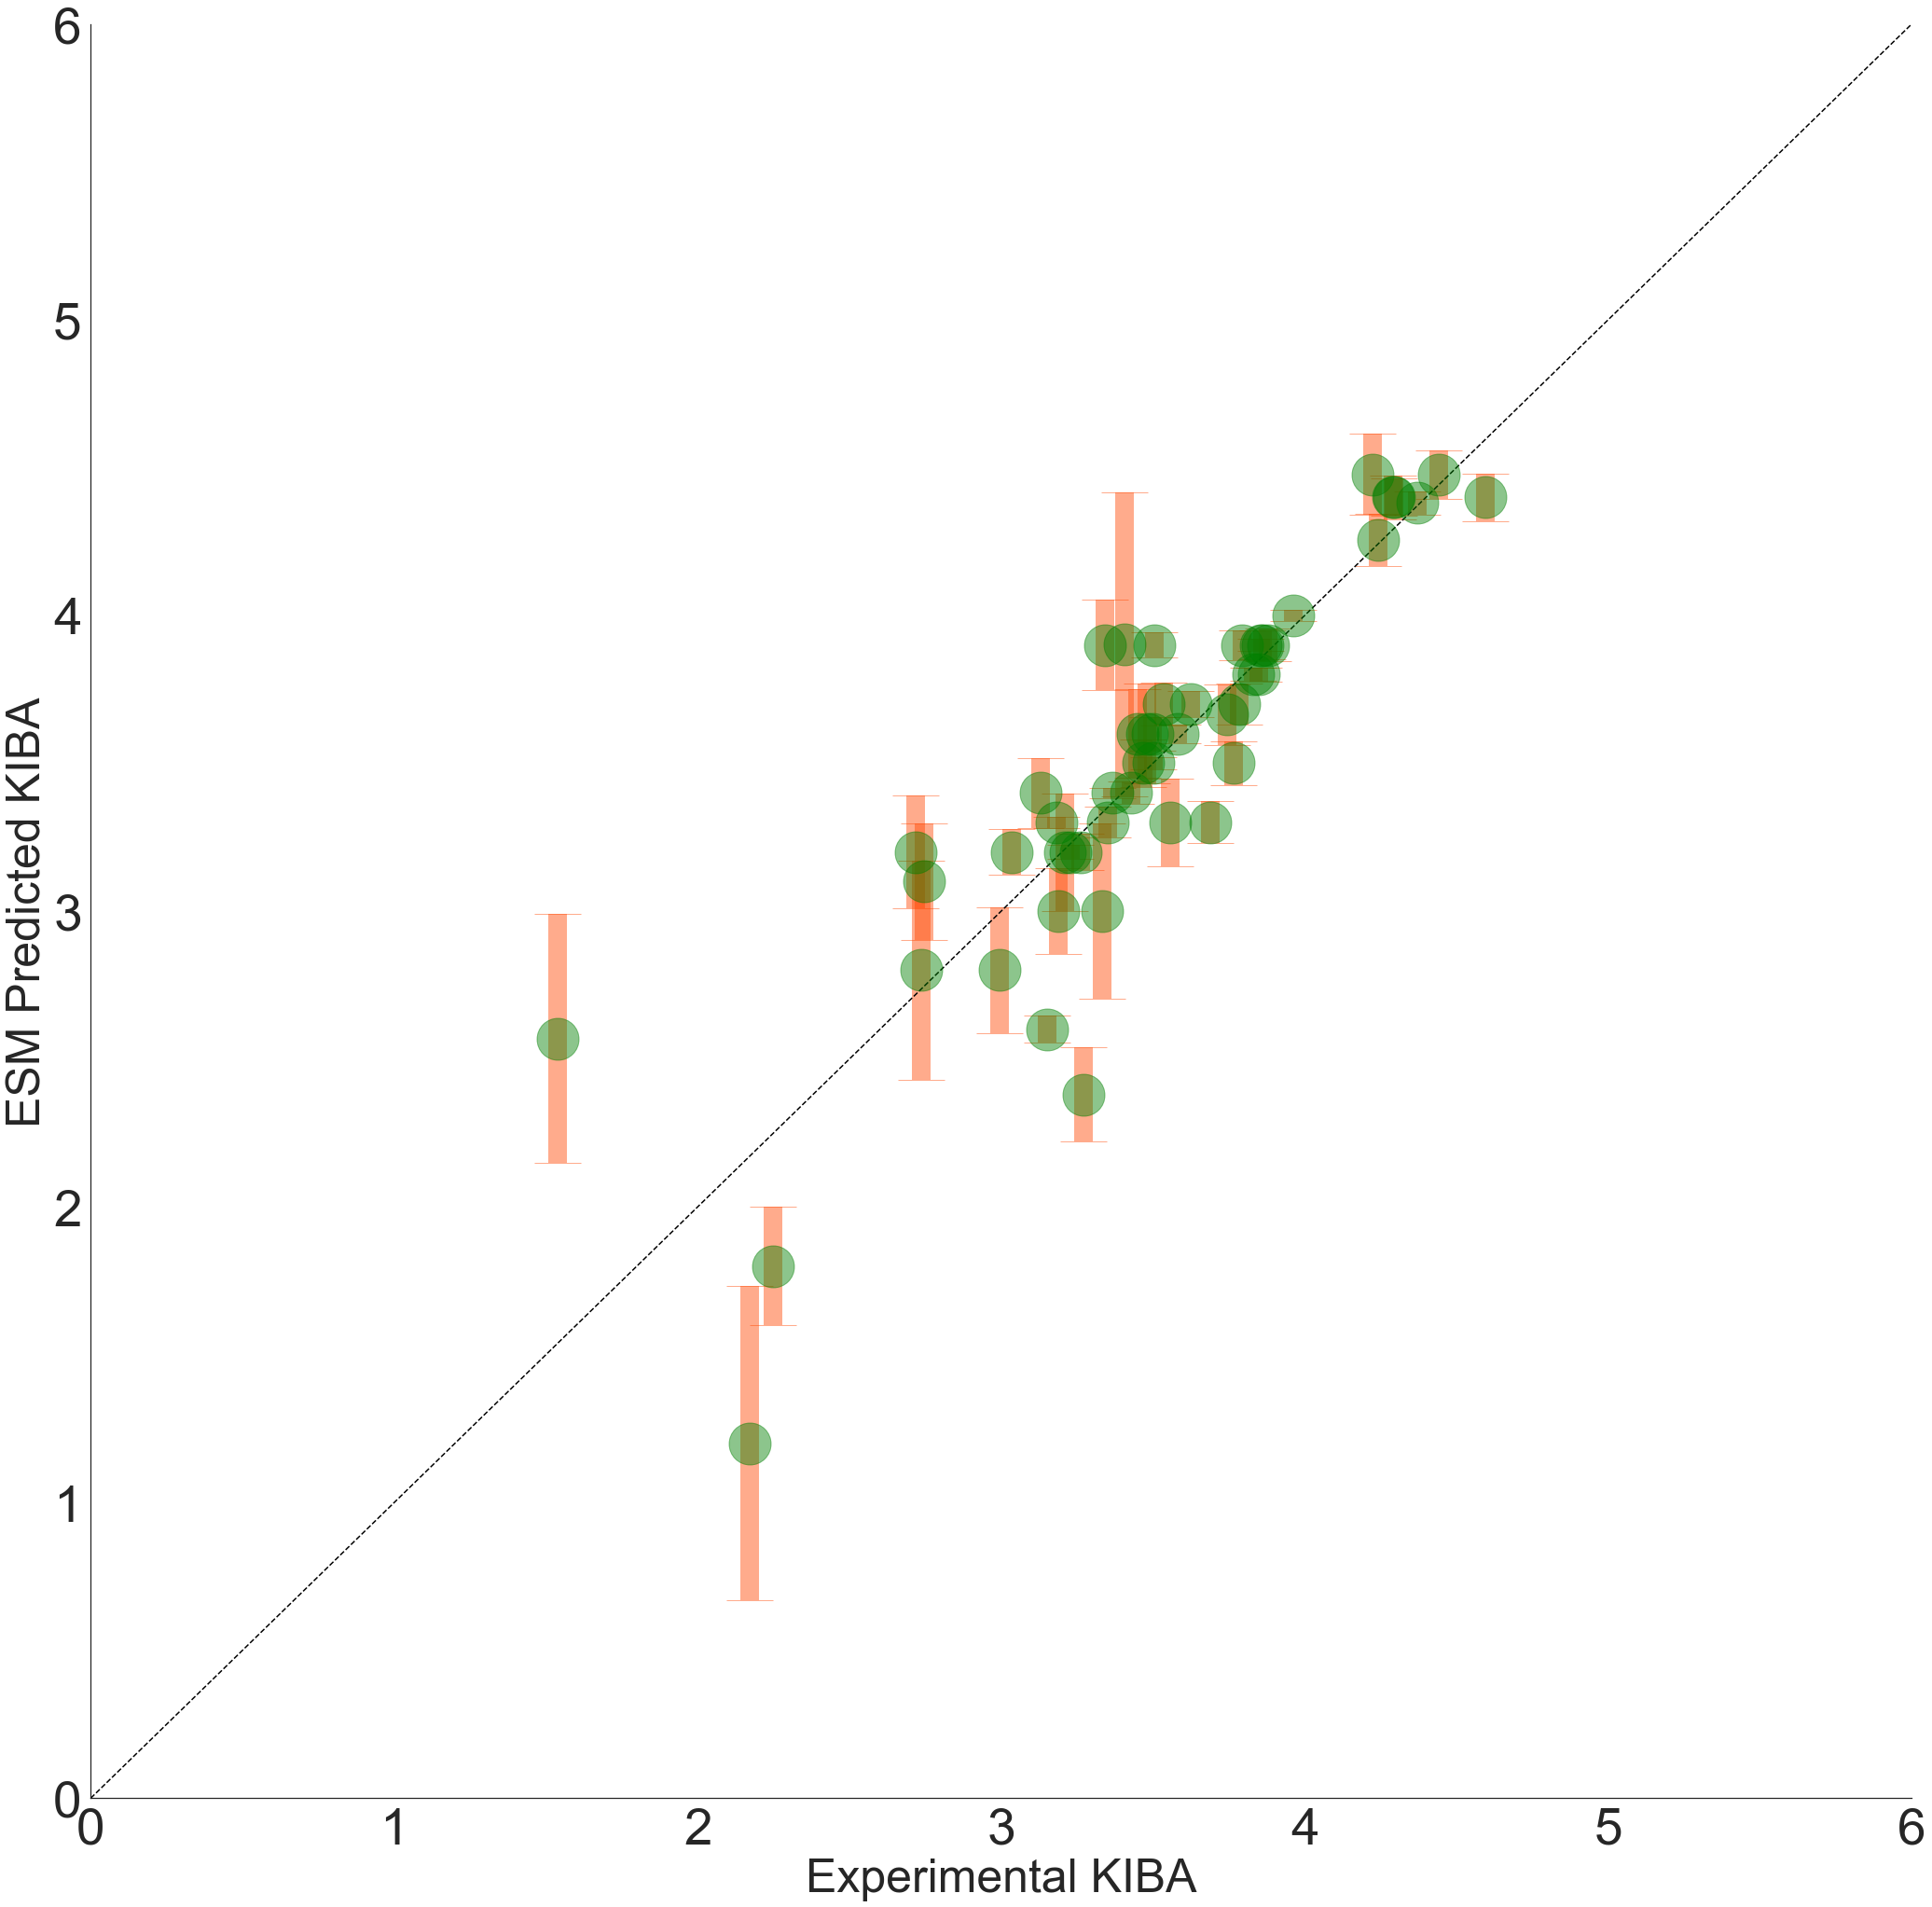

In [23]:
f, ax = plt.subplots(figsize=(35, 35))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_random2, x_random2, yerr=ers_random2,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('ESM Predicted KIBA',fontsize=50)
ax.set_xlabel('Experimental KIBA',fontsize=50)
leg = plt.gca().get_legend()
 
plt.show()
f.savefig(os.path.join('results_plots',  'ESM vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results_plots',  'ESM vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

### Training errors over 2000 epochs

In [83]:
sns.set(font_scale = 2,style="white")

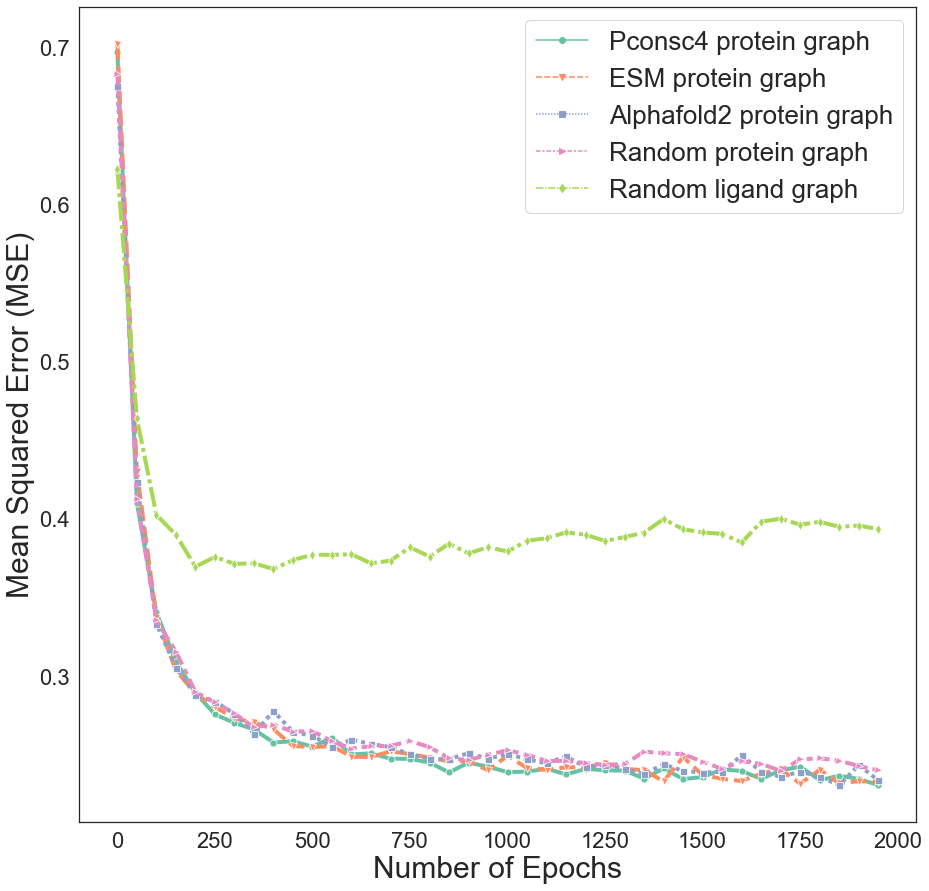

In [84]:
fig = plt.figure(figsize=(15, 15))


ax =  sns.lineplot(x = "Number of Epochs", y = "Mean Squared Error (MSE)",hue='Method',data =train_mse[::50],palette='Set2',style="Method",
            markers = ["o", "v", "s", ">","d"],estimator=None, lw=4,ms=7)

ax.set_xlabel('Number of Epochs',fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)',fontsize=30)
plt.legend(loc='upper right',fontsize=26)

# fig.savefig(os.path.join('results6',  'training_errors' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results6',  'training_errors' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results6',  'training_errors' + '.svg'), dpi=500, bbox_inches='tight')
